<a href="https://www.kaggle.com/code/rajeshxdatascience/smartphone-specs-eda-feature-engineering?scriptVersionId=285558982" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smartphone-specifications-dataset-clean-and-ml-ready/Smartphone_cleaned.csv
/kaggle/input/smartphone-specifications-dataset-clean-and-ml-ready/Smartphone_Cleaned.parquet


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# EDA of the data set 

df = pd.read_parquet('/kaggle/input/smartphone-specifications-dataset-clean-and-ml-ready/Smartphone_Cleaned.parquet')
df.head()

,brand,model_name,price,rating,has_5g,has_nfc,has_ir_blaster,has_vo5g,chipset,chipset_brand,...,display_type,primary_real_cam_mp,primary_front_cam_mp,rear_cam_count,front_cam_count,memory_card_supported,max_external_storage_gb,is_hybrid_slot,os_name,os_version
0,Realme,P4x 5G,15999,68.0,1,0,0,0,Dimensity 7400 Ultra,MediaTek,...,Punch Hole,50.0,8.0,2,1,1,1024.0,1,Android,15.0
1,Samsung,Galaxy Z Tri Fold,219990,95.0,1,1,1,1,Snapdragon 8 Elite,Qualcomm,...,Punch Hole,200.0,10.0,3,2,0,0.0,0,Android,16.0
2,Samsung,Galaxy S24 Ultra,84999,92.0,1,1,0,1,Snapdragon 8 Gen3,Qualcomm,...,Punch Hole,200.0,12.0,4,1,0,0.0,0,Android,14.0
3,Oppo,Reno 15 5G,39990,90.0,1,1,1,0,Dimensity 8450,MediaTek,...,Punch Hole,200.0,50.0,3,1,0,0.0,0,Android,16.0
4,Vivo,X300 Pro 5G,109999,96.0,1,1,1,0,Dimensity 9500,MediaTek,...,Punch Hole,200.0,50.0,3,1,0,0.0,0,Android,16.0


In [4]:
import warnings
warnings.filterwarnings("ignore")

df = df.replace([np.inf, -np.inf], np.nan)

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
df.shape

(995, 36)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   brand                    995 non-null    object  
 1   model_name               995 non-null    object  
 2   price                    995 non-null    int64   
 3   rating                   995 non-null    float64 
 4   has_5g                   995 non-null    int64   
 5   has_nfc                  995 non-null    int64   
 6   has_ir_blaster           995 non-null    int64   
 7   has_vo5g                 995 non-null    int64   
 8   chipset                  995 non-null    object  
 9   chipset_brand            995 non-null    object  
 10  cpu_cores                995 non-null    float64 
 11  max_speed_ghz            860 non-null    float64 
 12  ram_gb                   995 non-null    Int64   
 13  storage_gb               995 non-null    Int64   
 14  battery_mA

In [8]:
df.isnull().sum().sort_values(ascending=False)

max_speed_ghz              135
os_version                  17
primary_front_cam_mp         2
battery_mAh                  1
display_type                 0
has_drop_notch               0
has_dynamic_island           0
is_foldable                  0
has_small_notch              0
has_large_notch              0
primary_real_cam_mp          0
refresh_hz                   0
rear_cam_count               0
front_cam_count              0
memory_card_supported        0
max_external_storage_gb      0
is_hybrid_slot               0
os_name                      0
has_punch_hole               0
brand                        0
model_name                   0
res_x                        0
display_inches               0
fast_charge_w                0
storage_gb                   0
ram_gb                       0
cpu_cores                    0
chipset_brand                0
chipset                      0
has_vo5g                     0
has_ir_blaster               0
has_nfc                      0
has_5g  

In [9]:
# knn imputer used to fill max_speed_ghz missing columns
df_knn = df.copy() 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_knn['chipset'] = le.fit_transform(df_knn['chipset'])
df_knn['chipset_brand'] = le.fit_transform(df_knn['chipset_brand'])

# columns that helps to find ghz
knn_features = ['chipset', 'chipset_brand', 'cpu_cores', 
                'ram_gb', 'storage_gb', 'max_speed_ghz']
# temporary df
knn_df = df_knn[knn_features]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_knn = scaler.fit_transform(knn_df)

# KNN imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
knn_imputed = imputer.fit_transform(scaled_knn)

# reverse scaling
knn_imputed = scaler.inverse_transform(knn_imputed)


In [10]:
df['max_speed_ghz'] = knn_imputed[:, knn_features.index('max_speed_ghz')]


In [11]:
# fill missing values of batter_mAh with median
df['battery_mAh'] = df['battery_mAh'].fillna(df['battery_mAh'].median())

In [12]:
# fill missing values of os using group median of os_name and os_version
df['os_version'] = df.groupby('os_name')['os_version'].transform(
    lambda x: x.fillna(x.median())
)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   brand                    995 non-null    object  
 1   model_name               995 non-null    object  
 2   price                    995 non-null    int64   
 3   rating                   995 non-null    float64 
 4   has_5g                   995 non-null    int64   
 5   has_nfc                  995 non-null    int64   
 6   has_ir_blaster           995 non-null    int64   
 7   has_vo5g                 995 non-null    int64   
 8   chipset                  995 non-null    object  
 9   chipset_brand            995 non-null    object  
 10  cpu_cores                995 non-null    float64 
 11  max_speed_ghz            995 non-null    float64 
 12  ram_gb                   995 non-null    Int64   
 13  storage_gb               995 non-null    Int64   
 14  battery_mA

In [14]:
df.describe()

,price,rating,has_5g,has_nfc,has_ir_blaster,has_vo5g,cpu_cores,max_speed_ghz,ram_gb,storage_gb,battery_mAh,fast_charge_w,display_inches,res_x,res_y,refresh_hz,has_punch_hole,has_drop_notch,has_dynamic_island,is_foldable,has_small_notch,has_large_notch,primary_real_cam_mp,primary_front_cam_mp,rear_cam_count,front_cam_count,memory_card_supported,max_external_storage_gb,is_hybrid_slot,os_version
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.0,995.0,995.0,995.0,995.000000,995.0,995.0,995.000000,995.000000,995.000000,995.000000,995.000000,995.00000,995.000000,995.000000,993.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,37735.090452,80.984925,0.917588,0.568844,0.393970,0.154774,7.949749,2.763093,9.432161,225.254271,5614.319598,68.343719,6.739176,1127.99196,2424.149749,118.510553,0.829146,0.112563,0.021106,0.001005,0.01407,0.001005,60.758291,23.288721,2.472362,1.024121,0.390955,484.341709,0.244221,14.581859
std,39806.548588,6.804453,0.275130,0.495487,0.488874,0.361871,0.441198,0.671985,12.094953,145.250005,967.949346,354.724438,0.419597,267.749342,433.654921,18.199781,0.376571,0.316217,0.143808,0.031702,0.11784,0.031702,39.234973,15.045848,0.668334,0.172043,0.488210,667.538458,0.429840,1.965496
min,3499.000000,45.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.300000,2.0,32.0,2050.0,10.0,4.700000,576.0,1080.0,60.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,8.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.200000
25%,15999.000000,77.000000,1.000000,0.000000,0.000000,0.000000,8.000000,2.400000,8.0,128.0,5000.0,30.0,6.670000,1080.0,2340.0,120.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,50.000000,12.000000,2.000000,1.000000,0.000000,0.000000,0.000000,14.000000
50%,23999.000000,82.000000,1.000000,1.000000,0.000000,0.000000,8.000000,2.500000,8.0,256.0,5500.0,45.0,6.710000,1080.0,2408.0,120.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,50.000000,16.000000,2.000000,1.000000,0.000000,0.000000,0.000000,15.000000
75%,39999.000000,85.000000,1.000000,1.000000,1.000000,0.000000,8.000000,3.200000,12.0,256.0,6020.0,80.0,6.780000,1260.0,2755.0,120.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,50.000000,32.000000,3.000000,1.000000,1.000000,1024.000000,0.000000,15.000000
max,480000.000000,97.000000,1.000000,1.000000,1.000000,1.000000,10.000000,4.600000,256.0,2048.0,10000.0,11200.0,11.500000,2780.0,3820.0,165.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,200.000000,60.000000,4.000000,2.000000,1.000000,2048.000000,1.000000,27.000000


In [15]:
# Univariate Analysis -> brand column 

In [16]:
df.head()

,brand,model_name,price,rating,has_5g,has_nfc,has_ir_blaster,has_vo5g,chipset,chipset_brand,cpu_cores,max_speed_ghz,ram_gb,storage_gb,battery_mAh,fast_charge_w,display_inches,res_x,res_y,refresh_hz,has_punch_hole,has_drop_notch,has_dynamic_island,is_foldable,has_small_notch,has_large_notch,display_type,primary_real_cam_mp,primary_front_cam_mp,rear_cam_count,front_cam_count,memory_card_supported,max_external_storage_gb,is_hybrid_slot,os_name,os_version
0,Realme,P4x 5G,15999,68.0,1,0,0,0,Dimensity 7400 Ultra,MediaTek,8.0,2.50,6,128,7000,45,6.72,1080,2400,144,1,0,0,0,0,0,Punch Hole,50.0,8.0,2,1,1,1024.0,1,Android,15.0
1,Samsung,Galaxy Z Tri Fold,219990,95.0,1,1,1,1,Snapdragon 8 Elite,Qualcomm,8.0,4.32,16,512,5600,45,10.00,1584,2160,120,1,0,0,0,0,0,Punch Hole,200.0,10.0,3,2,0,0.0,0,Android,16.0
2,Samsung,Galaxy S24 Ultra,84999,92.0,1,1,0,1,Snapdragon 8 Gen3,Qualcomm,8.0,3.30,12,256,5000,45,6.80,1440,3120,120,1,0,0,0,0,0,Punch Hole,200.0,12.0,4,1,0,0.0,0,Android,14.0
3,Oppo,Reno 15 5G,39990,90.0,1,1,1,0,Dimensity 8450,MediaTek,8.0,3.25,12,256,6200,80,6.32,1216,2640,120,1,0,0,0,0,0,Punch Hole,200.0,50.0,3,1,0,0.0,0,Android,16.0
4,Vivo,X300 Pro 5G,109999,96.0,1,1,1,0,Dimensity 9500,MediaTek,8.0,4.21,16,512,6510,90,6.78,1260,2800,120,1,0,0,0,0,0,Punch Hole,200.0,50.0,3,1,0,0.0,0,Android,16.0


In [17]:
# brand 
df['brand'].value_counts()

brand
Samsung     147
Vivo        140
Realme      124
Oppo         97
Xiaomi       97
Motorola     70
OnePlus      52
Poco         47
Iqoo         44
Infinix      37
Apple        36
Tecno        28
Honor        25
Nothing      21
Google       20
Huawei       10
Name: count, dtype: int64

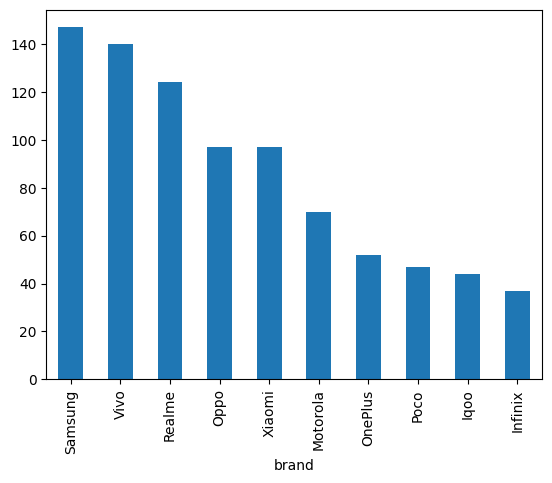

In [18]:
# plot a graph of top 10 brands
df['brand'].value_counts().head(10).plot(kind='bar')
plt.show()

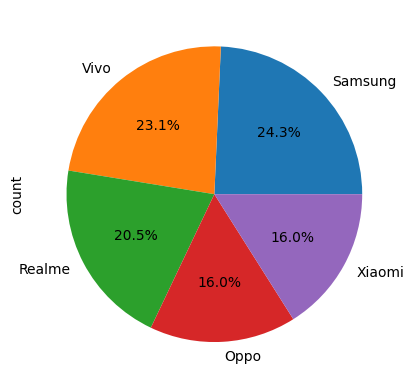

In [19]:
# percentage wise
df['brand'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [20]:
# Univariate Analysis -> price column 

In [21]:
# price
df = df.drop(index=773)
df['price'].describe()

count       994.000000
mean      37290.155936
std       37269.045949
min        3499.000000
25%       15999.000000
50%       23999.000000
75%       39999.000000
max      249990.000000
Name: price, dtype: float64

In [22]:
# the distribution is not normal. it has to be skewed
# there are outliers in column

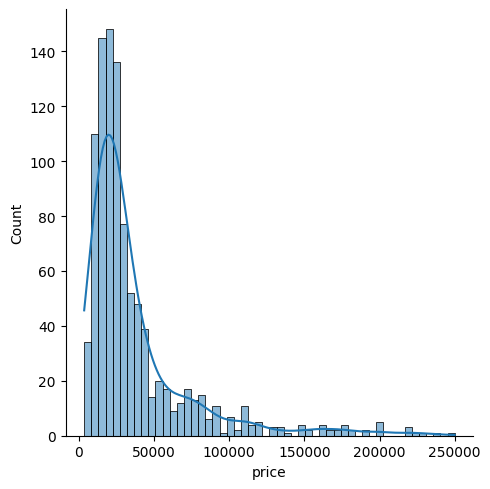

In [23]:
sns.displot(kind='hist',data=df,x='price',kde=True)
plt.show()

In [24]:
df['price'].skew()

2.6721284484595937

In [25]:
# price column is skewed so we have to create a column which contains price in log and this 
# column will be used for ml only 
# after ml model trained u can convet back to actual price
df['price_log'] = np.log1p(df['price'])
df['price_log'].head()

0     9.680344
1    12.301342
2    11.350407
3    10.596410
4    11.608236
Name: price_log, dtype: float64

In [26]:
df['price_log'].skew()

0.6006039291946174

In [27]:
df['price_log'].describe()

count    994.000000
mean      10.207158
std        0.749726
min        8.160518
25%        9.680344
50%       10.085809
75%       10.596635
max       12.429180
Name: price_log, dtype: float64

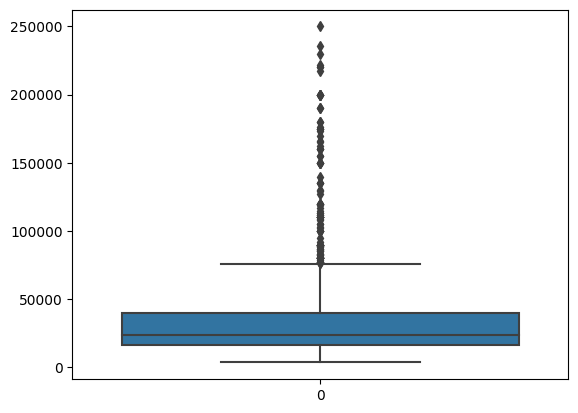

In [28]:
sns.boxplot(df['price'])
plt.show()

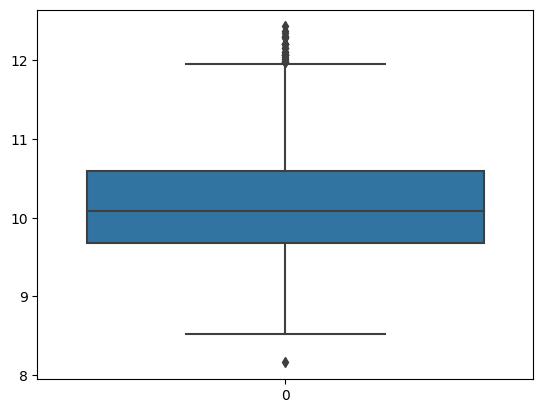

In [29]:
sns.boxplot(df['price_log'])
plt.show()

In [30]:
df[df['price'] > 200000][['brand','model_name','price']]

,brand,model_name,price
1,Samsung,Galaxy Z Tri Fold,219990
258,Samsung,Galaxy Z Fold 7,216999
304,Huawei,Mate XT Ultimate,235990
320,Apple,iPhone 17 Pro Max,229900
716,Xiaomi,Tri-Fold,219999
865,Huawei,Mate XTs Ultimate,221990
870,Huawei,Mate XT 2,249990


In [31]:
df['price'].isnull().sum()

0

In [32]:
# rating
# there are no missing values
df['rating'].describe()

count    994.000000
mean      80.979879
std        6.806016
min       45.000000
25%       77.000000
50%       82.000000
75%       85.000000
max       97.000000
Name: rating, dtype: float64

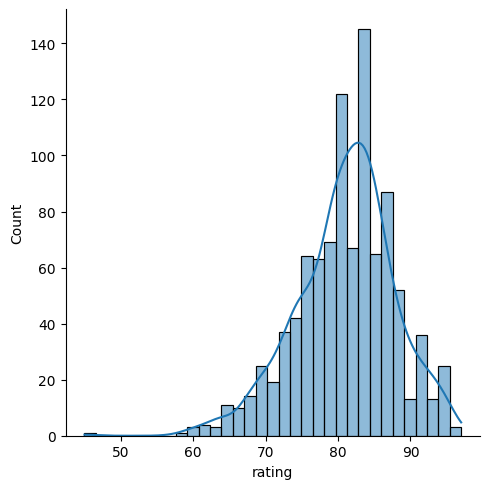

In [33]:
sns.displot(kind='hist',data=df,x='rating',kde=True)
plt.show()

In [34]:
df['rating'].skew()

-0.5186609196293304

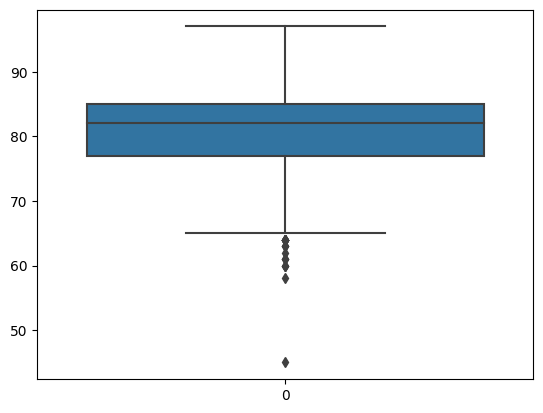

In [35]:
sns.boxplot(df['rating'])
plt.show()

In [36]:
df[df['rating'] < 60][['brand','model_name','rating']]
# it is okay these are real rating 

,brand,model_name,rating
519,Xiaomi,Qin 2 Pro,45.0
784,Vivo,Y04s,58.0


In [37]:
df['rating'].isnull().sum()

0

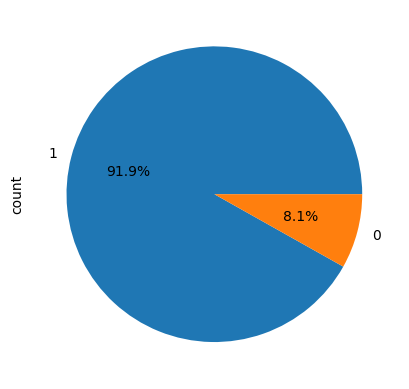

In [38]:
# has_5g
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [39]:
df[df['has_5g'] == 1]['brand'].value_counts()

brand
Samsung     139
Vivo        131
Realme      114
Oppo         93
Xiaomi       79
Motorola     63
OnePlus      52
Iqoo         44
Poco         42
Apple        35
Infinix      25
Honor        23
Tecno        22
Nothing      21
Google       20
Huawei       10
Name: count, dtype: int64

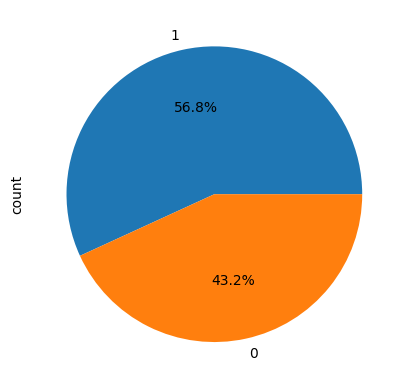

In [40]:
# has_nfc
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [41]:
df[df['has_nfc'] == 1]['brand'].value_counts()

brand
Samsung     113
Vivo         51
Xiaomi       51
OnePlus      43
Oppo         41
Motorola     40
Apple        36
Realme       31
Tecno        24
Honor        22
Iqoo         21
Nothing      21
Infinix      21
Poco         20
Google       20
Huawei       10
Name: count, dtype: int64

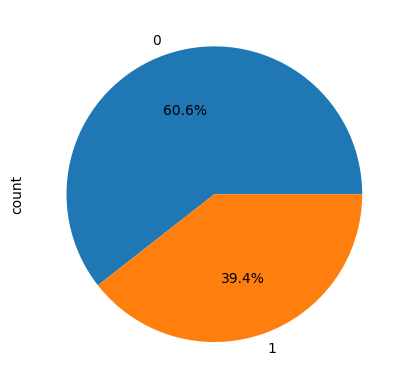

In [42]:
# has_ir_blaster
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [43]:
df[df['has_ir_blaster'] == 1]['brand'].value_counts()

brand
Xiaomi     73
Vivo       54
Oppo       48
OnePlus    42
Poco       38
Realme     32
Iqoo       31
Tecno      25
Infinix    23
Honor      15
Huawei      9
Samsung     1
Apple       1
Name: count, dtype: int64

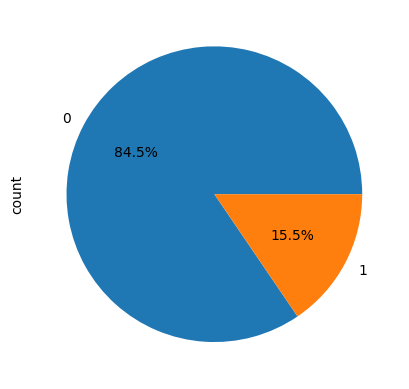

In [44]:
# has_vo5g
df['has_vo5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [45]:
df[df['has_vo5g'] == 1]['brand'].value_counts()

brand
Samsung     45
Motorola    26
OnePlus     20
Xiaomi      19
Realme      13
Vivo         9
Google       8
Iqoo         3
Poco         3
Huawei       3
Honor        2
Tecno        2
Oppo         1
Name: count, dtype: int64

In [46]:
df['chipset_family'] = df['chipset'].str.extract(r'([A-Za-z]+)')


In [47]:
counts = df['chipset'].value_counts()
rare = counts[counts < 3].index
df['chipset_clean'] = df['chipset'].replace(rare, 'Other')


In [48]:
rare_families = ['Google', 'Tiger', 'Xring', 'A']
df['chipset_family'] = df['chipset_family'].replace(rare_families, 'Other')


In [49]:
def assign_chipset_tier(family):
    if family in ['Snapdragon', 'Bionic', 'Tensor', 'Apple', 'Kirin']:
        return 1   # Flagship
    elif family in ['Exynos']:
        return 2   # Upper Midrange
    elif family in ['Dimensity', 'Helio']:
        return 3   # Midrange
    elif family in ['Unisoc', 'Unknown', 'others']:
        return 4   # Budget / Entry
    else:
        return 4   # fallback for rare cases

df['chipset_tier'] = df['chipset_family'].apply(assign_chipset_tier)


In [50]:
df['chipset_tier'].value_counts()

chipset_tier
1    438
3    414
4     83
2     59
Name: count, dtype: int64

In [51]:
df.drop(columns=['chipset'],inplace=True)

In [52]:
df.drop(columns=['chipset_family'],inplace=True)

In [53]:
df.drop(columns=['chipset_clean'],inplace=True)

In [54]:
df.head()

,brand,model_name,price,rating,has_5g,has_nfc,has_ir_blaster,has_vo5g,chipset_brand,cpu_cores,max_speed_ghz,ram_gb,storage_gb,battery_mAh,fast_charge_w,display_inches,res_x,res_y,refresh_hz,has_punch_hole,has_drop_notch,has_dynamic_island,is_foldable,has_small_notch,has_large_notch,display_type,primary_real_cam_mp,primary_front_cam_mp,rear_cam_count,front_cam_count,memory_card_supported,max_external_storage_gb,is_hybrid_slot,os_name,os_version,price_log,chipset_tier
0,Realme,P4x 5G,15999,68.0,1,0,0,0,MediaTek,8.0,2.50,6,128,7000,45,6.72,1080,2400,144,1,0,0,0,0,0,Punch Hole,50.0,8.0,2,1,1,1024.0,1,Android,15.0,9.680344,3
1,Samsung,Galaxy Z Tri Fold,219990,95.0,1,1,1,1,Qualcomm,8.0,4.32,16,512,5600,45,10.00,1584,2160,120,1,0,0,0,0,0,Punch Hole,200.0,10.0,3,2,0,0.0,0,Android,16.0,12.301342,1
2,Samsung,Galaxy S24 Ultra,84999,92.0,1,1,0,1,Qualcomm,8.0,3.30,12,256,5000,45,6.80,1440,3120,120,1,0,0,0,0,0,Punch Hole,200.0,12.0,4,1,0,0.0,0,Android,14.0,11.350407,1
3,Oppo,Reno 15 5G,39990,90.0,1,1,1,0,MediaTek,8.0,3.25,12,256,6200,80,6.32,1216,2640,120,1,0,0,0,0,0,Punch Hole,200.0,50.0,3,1,0,0.0,0,Android,16.0,10.596410,3
4,Vivo,X300 Pro 5G,109999,96.0,1,1,1,0,MediaTek,8.0,4.21,16,512,6510,90,6.78,1260,2800,120,1,0,0,0,0,0,Punch Hole,200.0,50.0,3,1,0,0.0,0,Android,16.0,11.608236,3


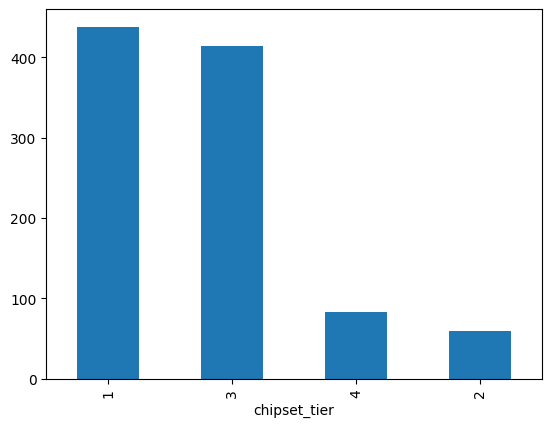

In [55]:
df['chipset_tier'].value_counts().plot(kind='bar')
plt.show()

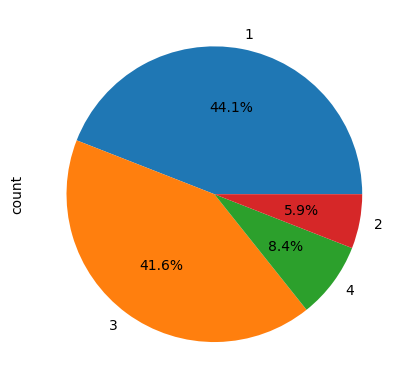

In [56]:
df['chipset_tier'].value_counts().head(5).plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [57]:
df['primary_front_cam_mp'] = pd.to_numeric(df['primary_front_cam_mp'], errors='coerce')


In [58]:
df['primary_front_cam_mp'].fillna(df['primary_front_cam_mp'].median(), inplace=True)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 994
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   brand                    994 non-null    object  
 1   model_name               994 non-null    object  
 2   price                    994 non-null    int64   
 3   rating                   994 non-null    float64 
 4   has_5g                   994 non-null    int64   
 5   has_nfc                  994 non-null    int64   
 6   has_ir_blaster           994 non-null    int64   
 7   has_vo5g                 994 non-null    int64   
 8   chipset_brand            994 non-null    object  
 9   cpu_cores                994 non-null    float64 
 10  max_speed_ghz            994 non-null    float64 
 11  ram_gb                   994 non-null    Int64   
 12  storage_gb               994 non-null    Int64   
 13  battery_mAh              994 non-null    Int64   
 14  fast_charge_w  

In [60]:
# chipset_brand
df['chipset_brand'].value_counts()

chipset_brand
MediaTek    414
Qualcomm    380
Samsung      59
Unknown      59
Apple        34
Unisoc       23
Google       17
Kirin         8
Name: count, dtype: int64

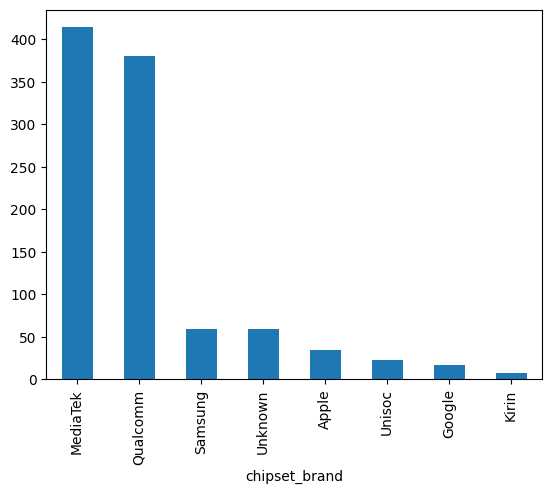

In [61]:
# there are 59 unknown chipset_brand
df['chipset_brand'].value_counts().plot(kind='bar')
plt.show()

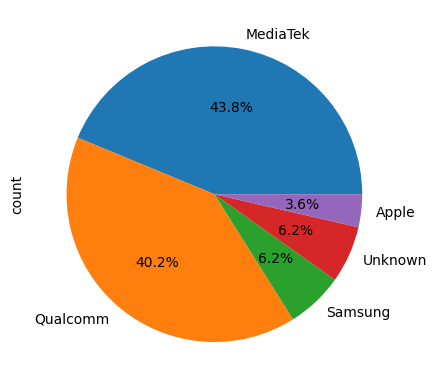

In [62]:
df['chipset_brand'].value_counts().head(5).plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [63]:
# cpu_cores -> 8.0 contains 95% of data 
df['cpu_cores'].value_counts()

cpu_cores
8.0     948
6.0      34
10.0     11
4.0       1
Name: count, dtype: int64

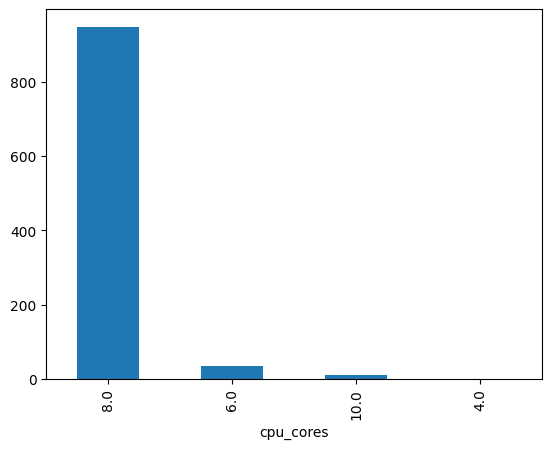

In [64]:
df['cpu_cores'].value_counts().plot(kind='bar')
plt.show()

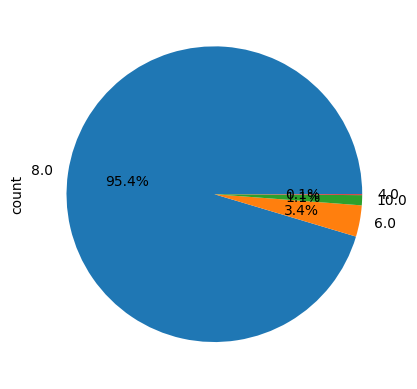

In [65]:
df['cpu_cores'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

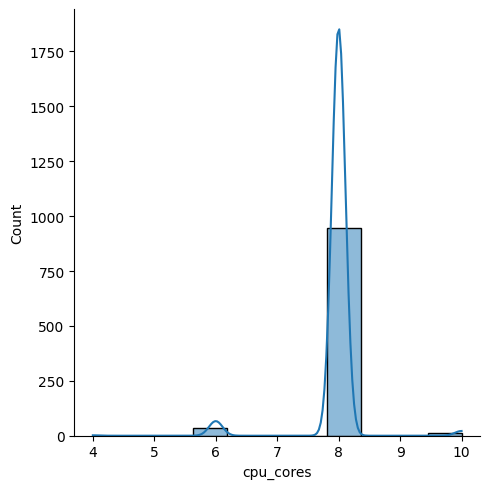

In [66]:
sns.displot(kind='hist',data=df,x='cpu_cores',kde=True)
plt.show()

<Axes: >

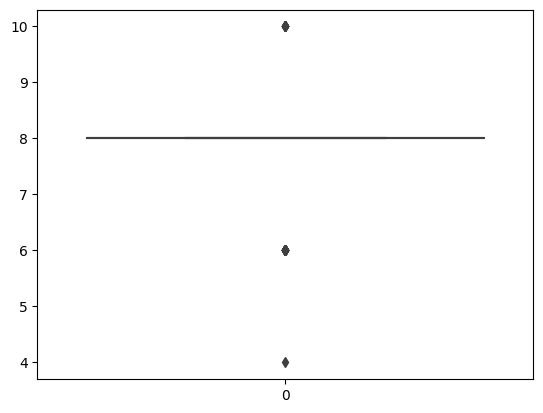

In [67]:
sns.boxplot(df['cpu_cores'])

In [68]:

'''
After KNN imputation, max_speed_ghz shows a realistic and hardware-consistent distribution 
ranging from 1.3 to 4.6 GHz. The frequencies align with the expected CPU speeds of entry-level,
mid-range, and flagship chipsets, confirming that KNN produced accurate and reliable
estimates suitable for price prediction modeling.'''

'\nAfter KNN imputation, max_speed_ghz shows a realistic and hardware-consistent distribution \nranging from 1.3 to 4.6 GHz. The frequencies align with the expected CPU speeds of entry-level,\nmid-range, and flagship chipsets, confirming that KNN produced accurate and reliable\nestimates suitable for price prediction modeling.'

In [69]:
df['max_speed_ghz'].value_counts().head(10)

max_speed_ghz
2.400    177
2.500    118
2.200     91
1.944     42
2.600     41
3.200     39
2.800     37
2.000     36
2.300     31
3.350     31
Name: count, dtype: int64

<Axes: xlabel='max_speed_ghz'>

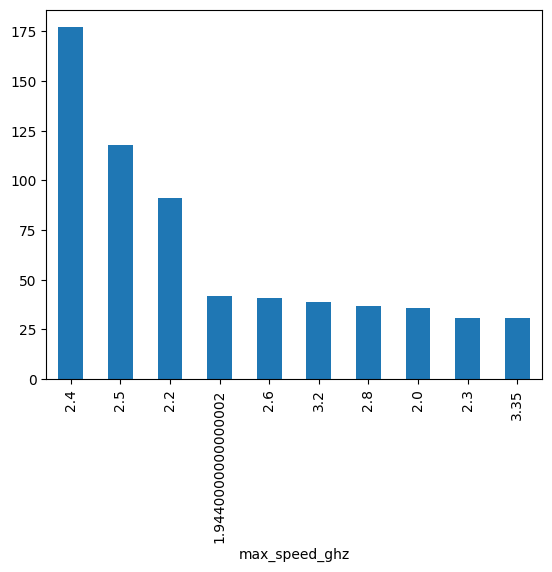

In [70]:
# max_speed_ghz 
df['max_speed_ghz'].value_counts().head(10).plot(kind='bar')

In [71]:
df['max_speed_ghz'].isnull().sum()

0

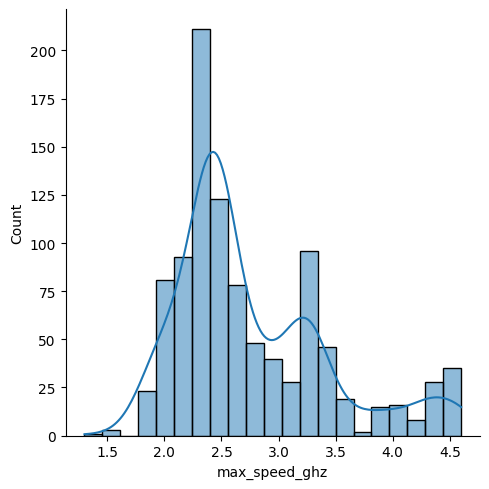

In [72]:
sns.displot(kind='hist',data=df,x='max_speed_ghz',kde=True)
plt.show()

<Axes: >

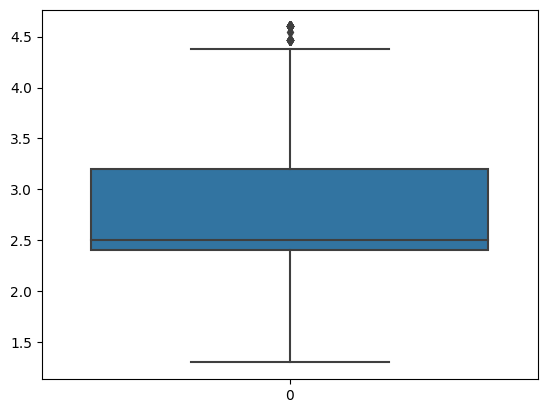

In [73]:
sns.boxplot(df['max_speed_ghz'])

In [74]:
df['max_speed_ghz'].skew()

1.069548983054294

In [75]:
# drop same value 
df = df.drop(index=203)

In [76]:
# ram_gb
df['ram_gb'].value_counts()

ram_gb
8      448
12     263
6      117
4      103
16      53
3        3
2        3
256      2
20       1
Name: count, dtype: Int64

In [77]:
# iphone 16 plus ram = 8gb
df.loc[454,'ram_gb'] = 8

In [78]:
# fix Nova 15 column
df.loc[859,'ram_gb'] = 12
df.loc[859,'storage_gb'] = 256

<Axes: xlabel='ram_gb'>

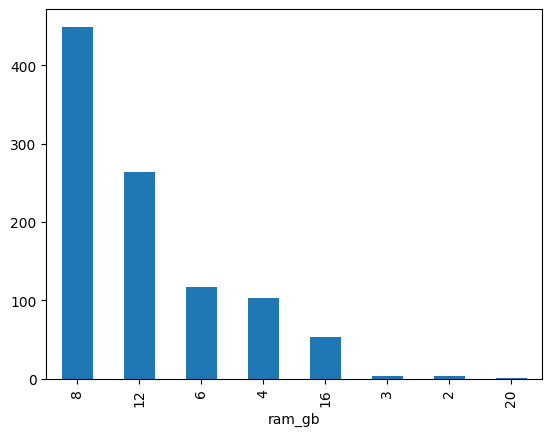

In [79]:
df['ram_gb'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

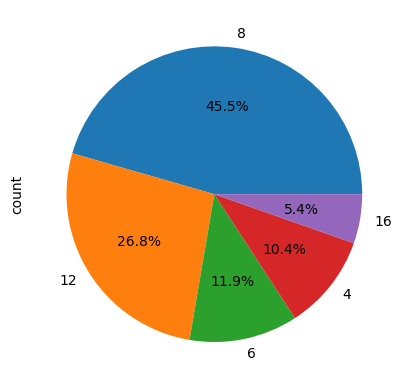

In [80]:
df['ram_gb'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')

In [81]:
df['ram_gb'].isnull().sum()

0

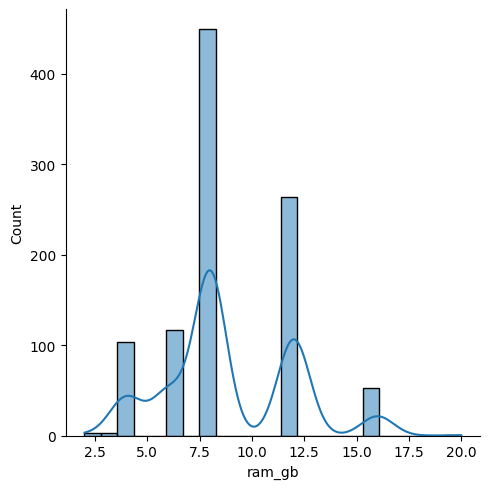

In [82]:
sns.displot(kind='hist',data=df,x='ram_gb',kde=True)
plt.show()

<Axes: >

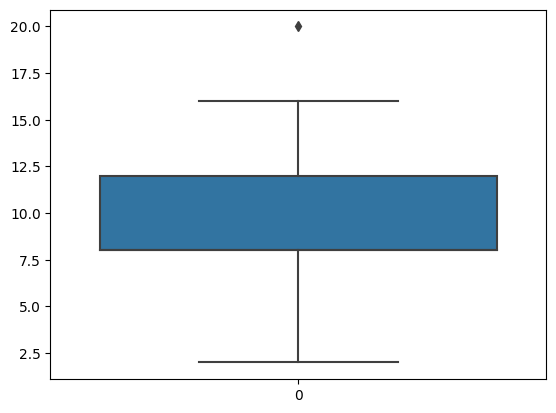

In [83]:
sns.boxplot(df['ram_gb'])

In [84]:
df['ram_gb'].skew()

0.47117853124820686

In [85]:
# storage_gb - there are some values 1024 and 2048 gb 
df['storage_gb'].value_counts()

storage_gb
256     423
128     416
512     100
64       45
1024      6
32        2
2048      1
Name: count, dtype: Int64

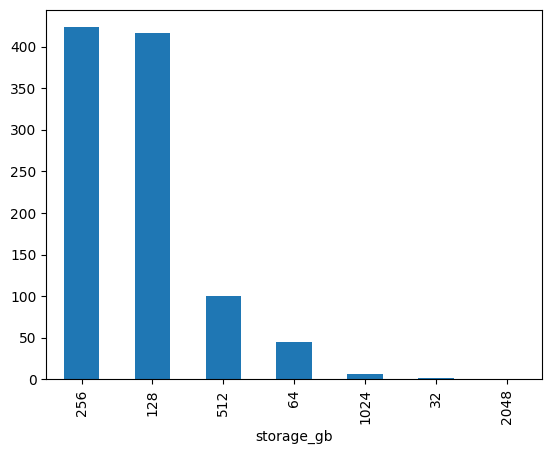

In [86]:
df['storage_gb'].value_counts().plot(kind='bar')
plt.show()

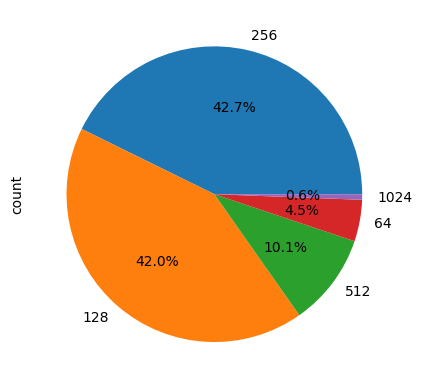

In [87]:
df['storage_gb'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [88]:
df[df['storage_gb'] == 1024]

,brand,model_name,price,rating,has_5g,has_nfc,has_ir_blaster,has_vo5g,chipset_brand,cpu_cores,max_speed_ghz,ram_gb,storage_gb,battery_mAh,fast_charge_w,display_inches,res_x,res_y,refresh_hz,has_punch_hole,has_drop_notch,has_dynamic_island,is_foldable,has_small_notch,has_large_notch,display_type,primary_real_cam_mp,primary_front_cam_mp,rear_cam_count,front_cam_count,memory_card_supported,max_external_storage_gb,is_hybrid_slot,os_name,os_version,price_log,chipset_tier
258,Samsung,Galaxy Z Fold 7,216999,97.0,1,1,0,1,Qualcomm,8.0,4.470,16,1024,4400,25,8.00,1968,2184,120,1,0,0,0,0,0,Punch Hole,200.0,10.0,3,2,0,0.0,0,Android,16.0,12.287653,1
463,Apple,iPhone 17 Pro Max,189900,83.0,1,1,0,0,Apple,6.0,3.994,12,1024,4832,20,6.90,1320,2868,120,0,0,1,0,0,0,Dynamic Island,48.0,18.0,3,1,0,0.0,0,iOS,26.0,12.154258,1
493,Samsung,Galaxy S25 Ultra,165999,94.0,1,1,0,1,Qualcomm,8.0,4.470,12,1024,5000,45,6.90,1440,3120,120,1,0,0,0,0,0,Punch Hole,200.0,12.0,4,1,0,0.0,0,Android,15.0,12.019743,1
796,Samsung,Galaxy S25 Ultra,175999,95.0,1,1,0,1,Qualcomm,8.0,4.470,16,1024,5000,45,6.90,1440,3120,120,1,0,0,0,0,0,Punch Hole,200.0,12.0,4,1,0,0.0,0,Android,15.0,12.078239,1
813,OnePlus,Open 5G Apex Edition,149998,94.0,1,1,1,0,Qualcomm,8.0,3.200,16,1024,4805,67,7.82,2268,2440,120,1,0,0,0,0,0,Punch Hole,64.0,32.0,3,2,0,0.0,0,Android,15.0,11.918384,1
898,Apple,iPhone 16 Pro Max,174900,89.0,1,1,0,0,Apple,6.0,4.050,8,1024,4685,20,6.90,1320,2868,120,0,0,1,0,0,0,Dynamic Island,48.0,12.0,3,1,0,0.0,0,iOS,18.0,12.071975,1


In [89]:
df[df['storage_gb'] == 2048]

,brand,model_name,price,rating,has_5g,has_nfc,has_ir_blaster,has_vo5g,chipset_brand,cpu_cores,max_speed_ghz,ram_gb,storage_gb,battery_mAh,fast_charge_w,display_inches,res_x,res_y,refresh_hz,has_punch_hole,has_drop_notch,has_dynamic_island,is_foldable,has_small_notch,has_large_notch,display_type,primary_real_cam_mp,primary_front_cam_mp,rear_cam_count,front_cam_count,memory_card_supported,max_external_storage_gb,is_hybrid_slot,os_name,os_version,price_log,chipset_tier
320,Apple,iPhone 17 Pro Max,229900,84.0,1,1,0,0,Apple,6.0,4.132,12,2048,4832,20,6.9,1320,2868,120,0,0,1,0,0,0,Dynamic Island,48.0,18.0,3,1,0,0.0,0,iOS,26.0,12.345404,1


In [90]:
df['storage_gb'].isnull().sum()

0

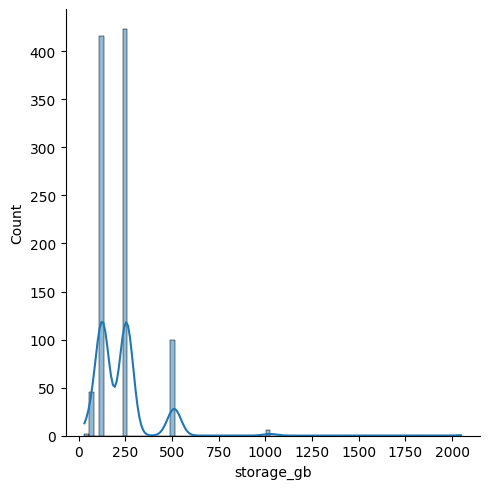

In [91]:
sns.displot(kind='hist',data=df,x='storage_gb',kde=True)
plt.show()

<Axes: >

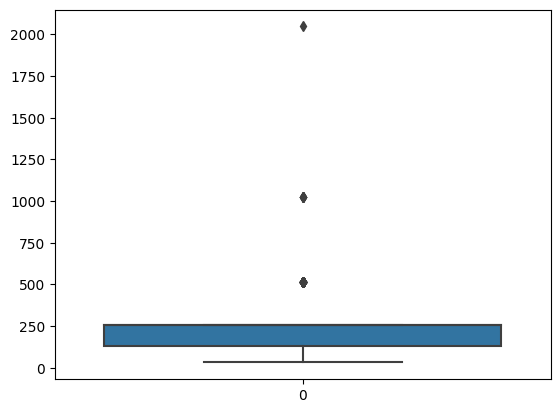

In [92]:
sns.boxplot(df['storage_gb'])

In [93]:
df['storage_gb'].skew()

3.5820839367202004

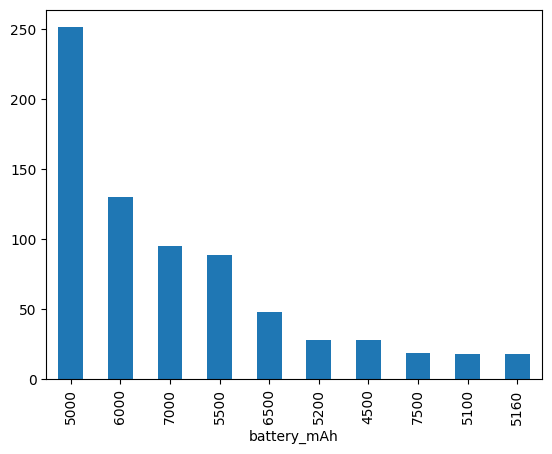

In [94]:
#  batery_mAh 
df['battery_mAh'].value_counts().head(10).plot(kind='bar')
plt.show()

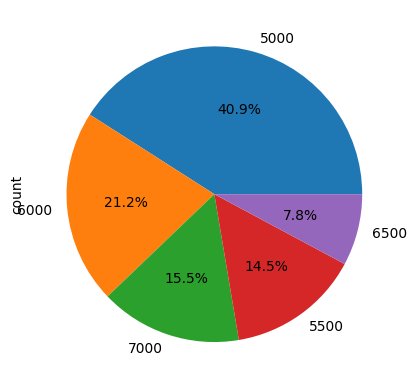

In [95]:
df['battery_mAh'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [96]:
df['battery_mAh'].isnull().sum()

0

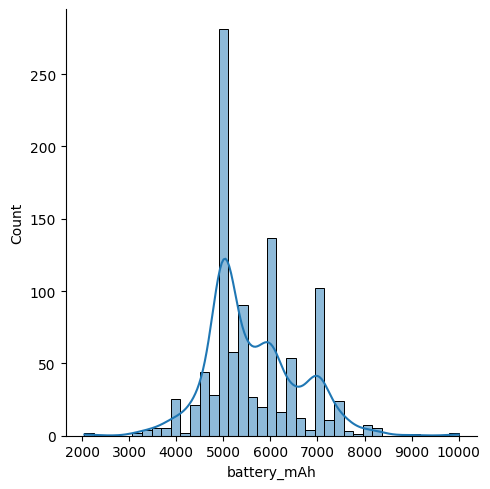

In [97]:
sns.displot(kind='hist',data=df,x='battery_mAh',kde=True)
plt.show()

<Axes: >

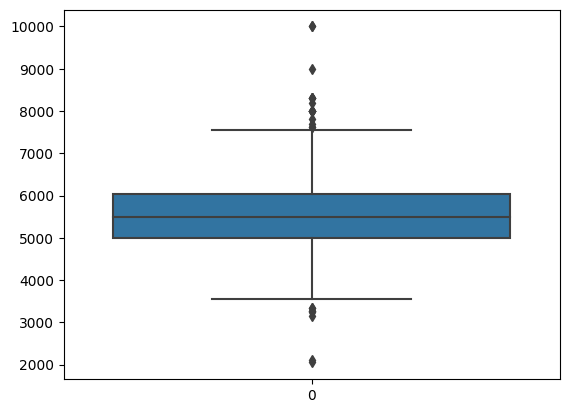

In [98]:
sns.boxplot(df['battery_mAh'])

In [99]:
df['battery_mAh'].skew()

0.500903223666221

In [100]:
# incorrect value is present should be 68
df.loc[319,'fast_charge_w'] = 68

In [101]:
df = df.drop(index=226)

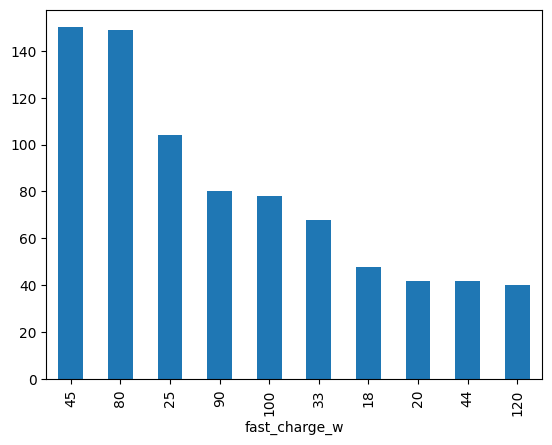

In [102]:
# fast_charge_w
df['fast_charge_w'].value_counts().head(10).plot(kind='bar')
plt.show()

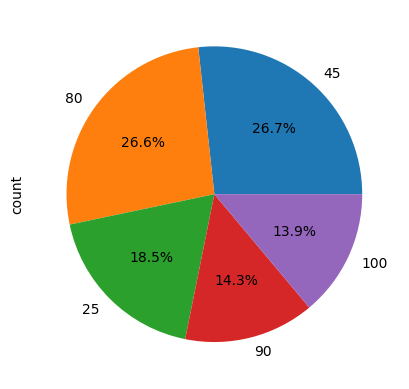

In [103]:
df['fast_charge_w'].value_counts().head(5).plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [104]:
df['fast_charge_w'].isnull().sum()

0

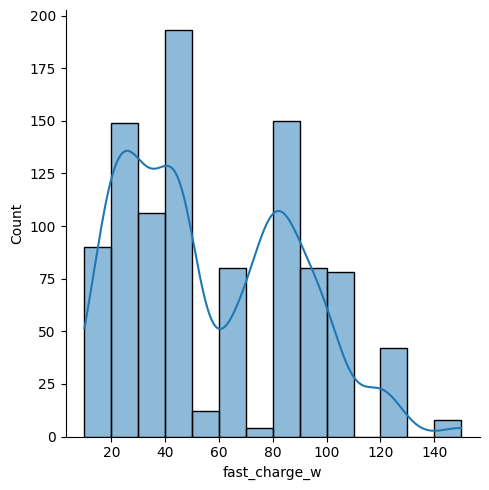

In [105]:
sns.displot(kind='hist',data=df,x='fast_charge_w',kde=True)
plt.show()

<Axes: >

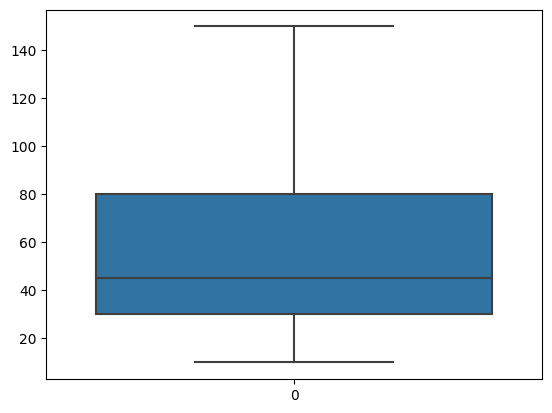

In [106]:
sns.boxplot(df['fast_charge_w'])

In [107]:
df[df['fast_charge_w'] > 300]

,brand,model_name,price,rating,has_5g,has_nfc,has_ir_blaster,has_vo5g,chipset_brand,cpu_cores,max_speed_ghz,ram_gb,storage_gb,battery_mAh,fast_charge_w,display_inches,res_x,res_y,refresh_hz,has_punch_hole,has_drop_notch,has_dynamic_island,is_foldable,has_small_notch,has_large_notch,display_type,primary_real_cam_mp,primary_front_cam_mp,rear_cam_count,front_cam_count,memory_card_supported,max_external_storage_gb,is_hybrid_slot,os_name,os_version,price_log,chipset_tier


In [108]:
df['fast_charge_w'].skew()

0.4844950471938017

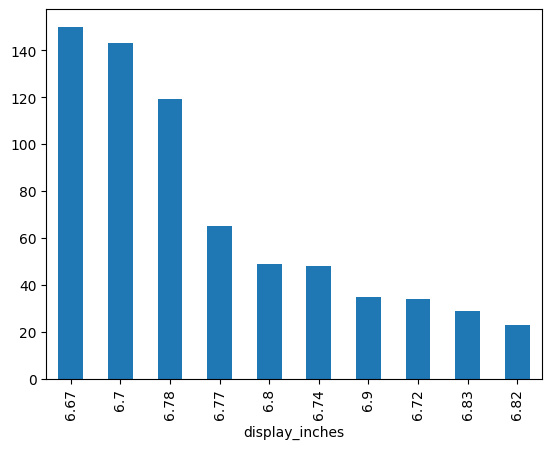

In [109]:
# display_inches
df['display_inches'].value_counts().head(10).plot(kind='bar')
plt.show()

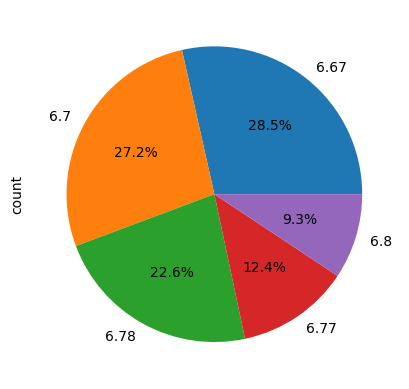

In [110]:
df['display_inches'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [111]:
df['display_inches'].isnull().sum()

0

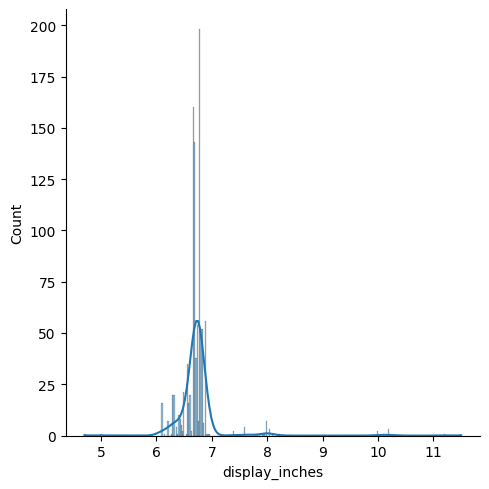

In [112]:
sns.displot(kind='hist',data=df,x='display_inches',kde=True)
plt.show()

<Axes: >

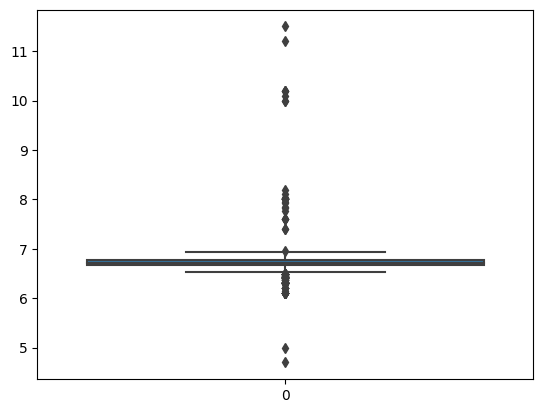

In [113]:
sns.boxplot(df['display_inches'])

In [114]:
df['display_inches'].skew()

6.008575617335893

<Axes: xlabel='res_x'>

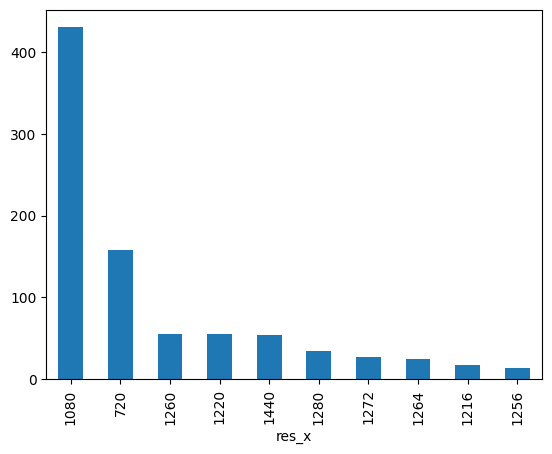

In [115]:
# res_x
df['res_x'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

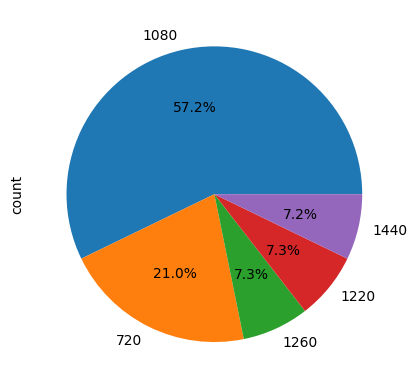

In [116]:
df['res_x'].value_counts().head(5).plot(kind='pie',autopct='%0.1f%%')

In [117]:
df['res_x'].isnull().sum()

0

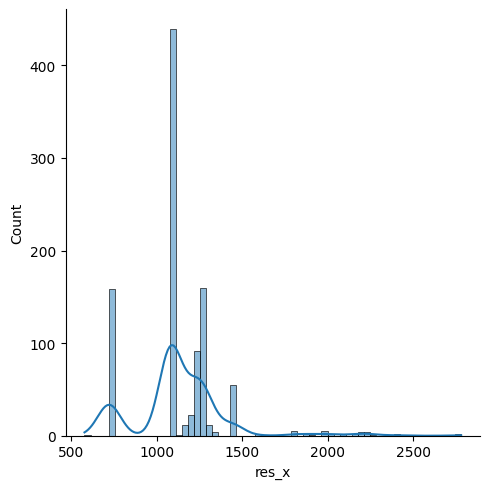

In [118]:
sns.displot(kind='hist',data=df,x='res_x',kde=True)
plt.show()

<Axes: >

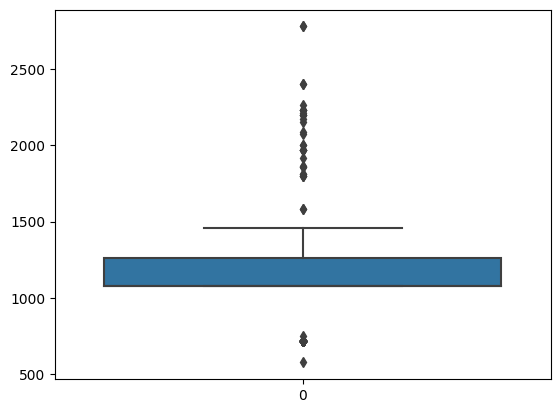

In [119]:
sns.boxplot(df['res_x'])

In [120]:
df[df['res_x'] > 2500][['brand','model_name','res_x','res_y']]

,brand,model_name,res_x,res_y
679,Xiaomi,Trifold,2780,3200
900,Tecno,Phantom Ultimate 2 Tri Fold,2780,3200


In [121]:
df['res_x'].skew()

1.4684016928096726

<Axes: xlabel='res_y'>

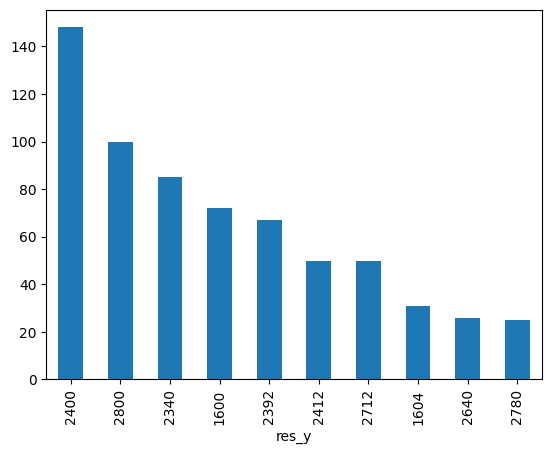

In [122]:
# res_y
df['res_y'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

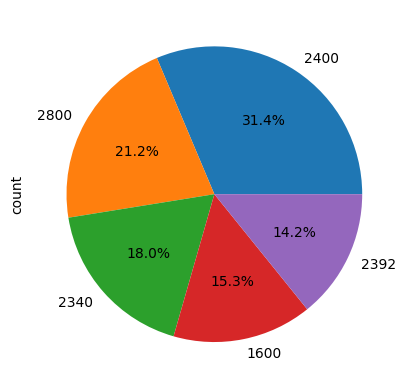

In [123]:
df['res_y'].value_counts().head(5).plot(kind='pie',autopct='%0.1f%%')

In [124]:
df['res_y'].isnull().sum()

0

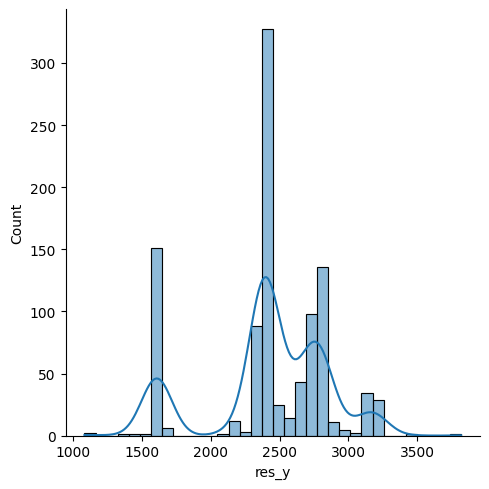

In [125]:
sns.displot(kind='hist',data=df,x='res_y',kde=True)
plt.show()

<Axes: >

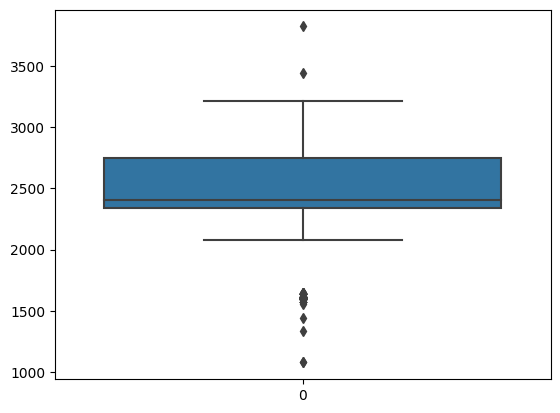

In [126]:
sns.boxplot(df['res_y'])

In [127]:
df[df['res_y'] > 3500][['brand','model_name','res_x','res_y']]

,brand,model_name,res_x,res_y
916,Realme,GT 6 Pro 5G,1864,3820


<Axes: xlabel='refresh_hz'>

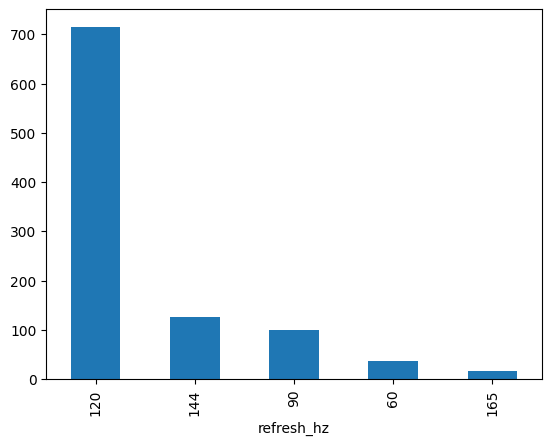

In [128]:
df['refresh_hz'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

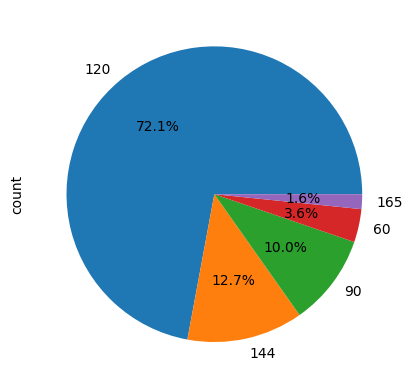

In [129]:
df['refresh_hz'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [130]:
df['refresh_hz'].value_counts()

refresh_hz
120    715
144    126
90      99
60      36
165     16
Name: count, dtype: int64

In [131]:
df['refresh_hz'].isnull().sum()

0

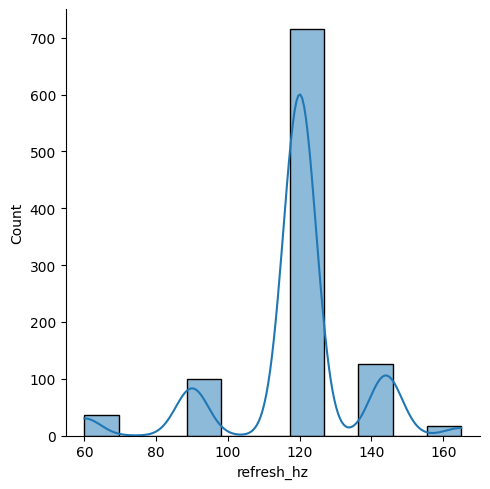

In [132]:
sns.displot(kind='hist',data=df,x='refresh_hz',kde=True)
plt.show()

<Axes: >

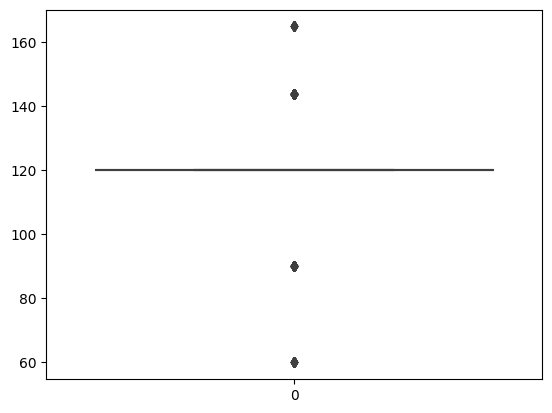

In [133]:
sns.boxplot(df['refresh_hz'])

In [134]:
df['has_punch_hole'].value_counts()

has_punch_hole
1    824
0    168
Name: count, dtype: int64

<Axes: ylabel='count'>

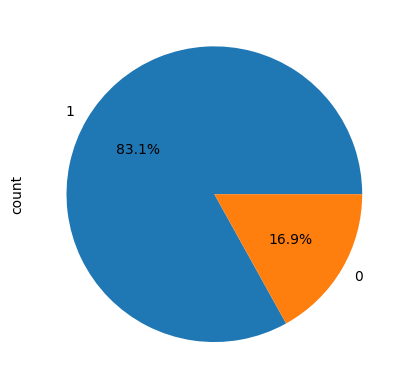

In [135]:
df['has_punch_hole'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [136]:
df['has_drop_notch'].value_counts()

has_drop_notch
0    880
1    112
Name: count, dtype: int64

<Axes: ylabel='count'>

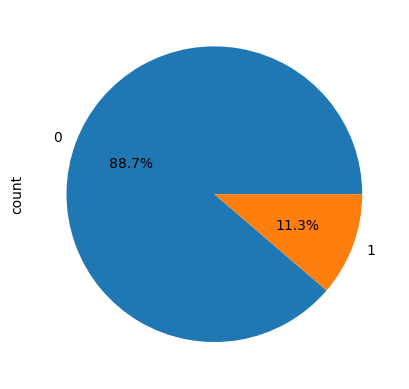

In [137]:
df['has_drop_notch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [138]:
df.drop(columns=['is_foldable'],inplace=True)

In [139]:
# this column is highly imbalanced 
df['has_dynamic_island'].value_counts()

has_dynamic_island
0    972
1     20
Name: count, dtype: int64

<Axes: ylabel='count'>

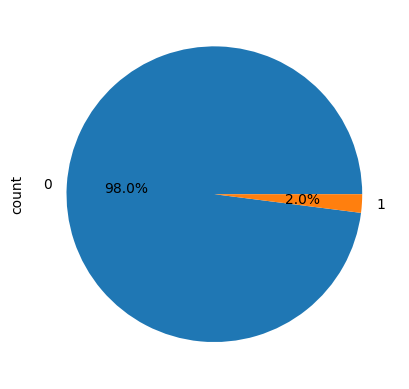

In [140]:
df['has_dynamic_island'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [141]:
# it is also imbalanced
df['has_small_notch'].value_counts()

has_small_notch
0    978
1     14
Name: count, dtype: int64

In [142]:
# punch_hole dominate 
df['display_type'].value_counts()

display_type
Punch Hole        824
Drop Notch        112
No Notch           21
Dynamic Island     20
Small Notch        14
Large Notch         1
Name: count, dtype: int64

In [143]:
df['display_type'] = df['display_type'].replace({'Large Notch':'Small Notch'})

<Axes: ylabel='count'>

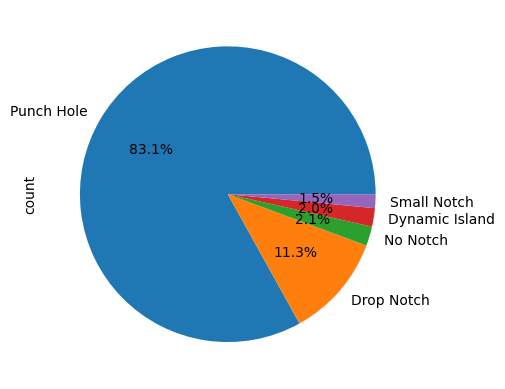

In [144]:
df['display_type'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [145]:
df['primary_real_cam_mp'].value_counts()

primary_real_cam_mp
50.0     713
200.0     62
64.0      59
48.0      47
108.0     44
13.0      28
32.0      18
12.0      12
8.0        4
12.2       1
16.0       1
180.0      1
100.0      1
50.3       1
Name: count, dtype: int64

In [146]:
df['primary_real_cam_mp'].describe()

count    992.000000
mean      60.794859
std       39.288631
min        8.000000
25%       50.000000
50%       50.000000
75%       50.000000
max      200.000000
Name: primary_real_cam_mp, dtype: float64

<Axes: ylabel='count'>

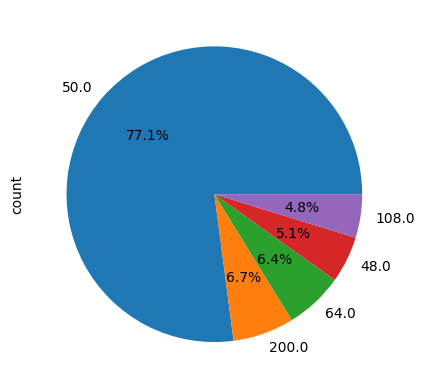

In [147]:
df['primary_real_cam_mp'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')

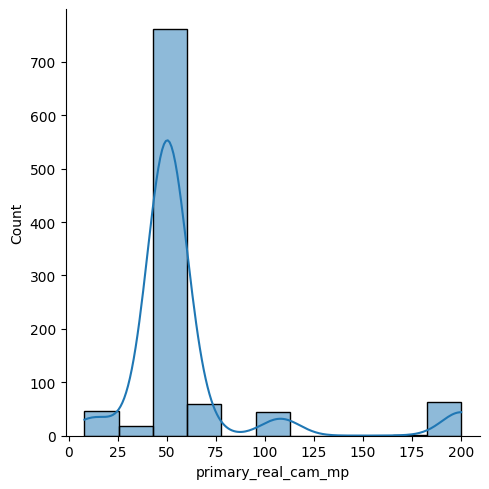

In [148]:
sns.displot(kind='hist',data=df,x='primary_real_cam_mp',kde=True)
plt.show()

<Axes: >

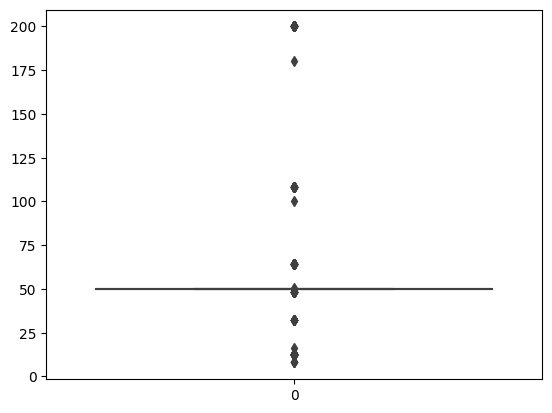

In [149]:
sns.boxplot(df['primary_real_cam_mp'])

In [150]:

df['primary_front_cam_mp'].value_counts()

primary_front_cam_mp
32.0    222
16.0    181
50.0    166
8.0     145
13.0     80
12.0     58
5.0      56
20.0     34
10.0     21
18.0     10
42.0      5
10.5      4
24.0      2
60.0      2
10.8      2
11.1      1
48.0      1
40.0      1
7.0       1
Name: count, dtype: int64

<Axes: ylabel='count'>

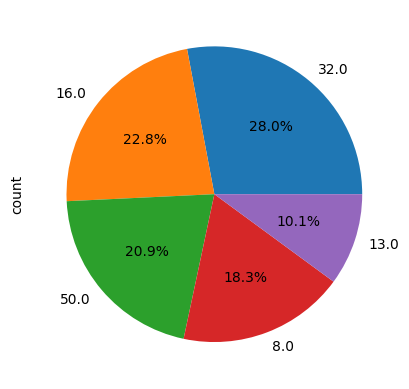

In [151]:
df['primary_front_cam_mp'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')

In [152]:
df['primary_front_cam_mp'].isnull().sum()

0

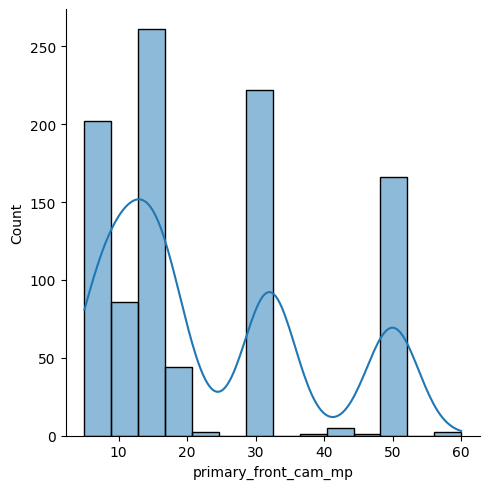

In [153]:
sns.displot(kind='hist',data=df,x='primary_front_cam_mp',kde=True)
plt.show()

<Axes: >

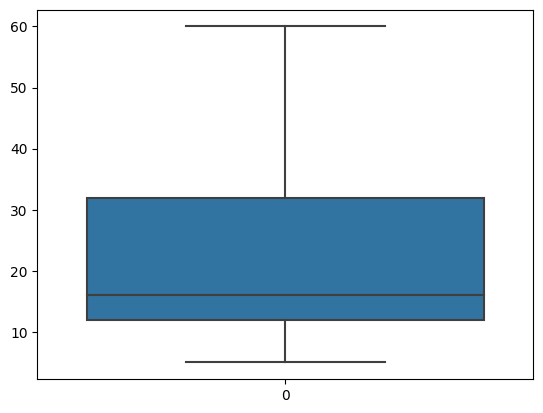

In [154]:
sns.boxplot(df['primary_front_cam_mp'])

In [155]:
df['rear_cam_count'].value_counts()

rear_cam_count
2    465
3    429
1     52
4     46
Name: count, dtype: int64

<Axes: ylabel='count'>

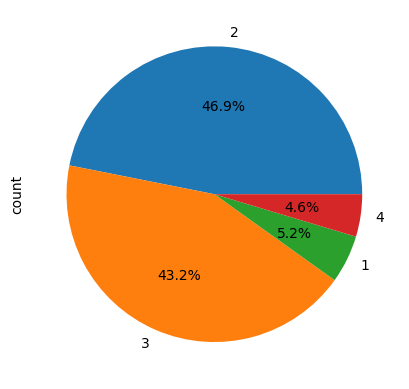

In [156]:
df['rear_cam_count'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')

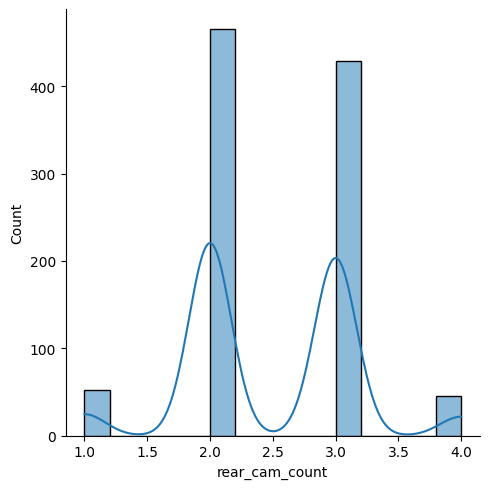

In [157]:
sns.displot(kind='hist',data=df,x='rear_cam_count',kde=True)
plt.show()

<Axes: >

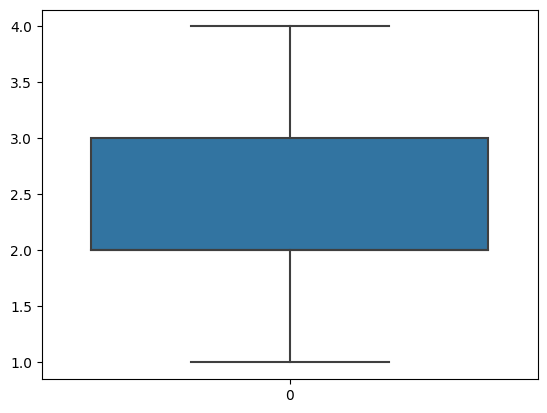

In [158]:
sns.boxplot(df['rear_cam_count'])

In [159]:
df.loc[791,'front_cam_count'] = 1

In [160]:
# higly imbalanced
df['front_cam_count'].value_counts()

front_cam_count
1    963
2     27
0      2
Name: count, dtype: int64

<Axes: ylabel='count'>

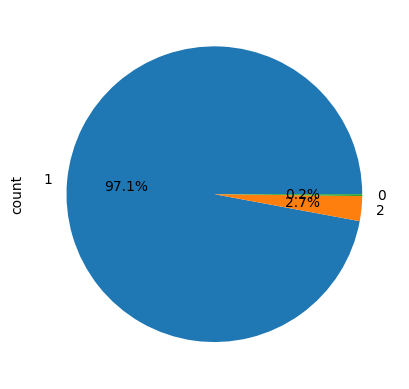

In [161]:
df['front_cam_count'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')

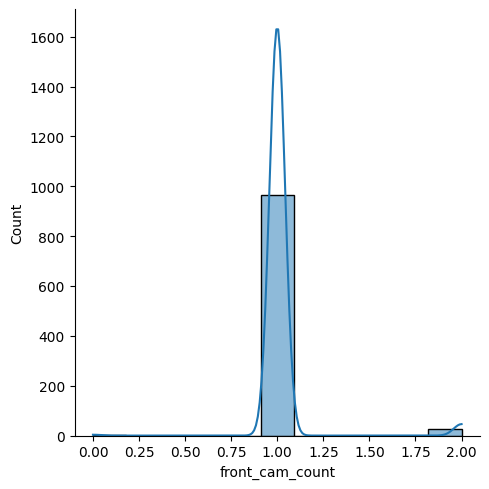

In [162]:
sns.displot(kind='hist',data=df,x='front_cam_count',kde=True)
plt.show()

<Axes: >

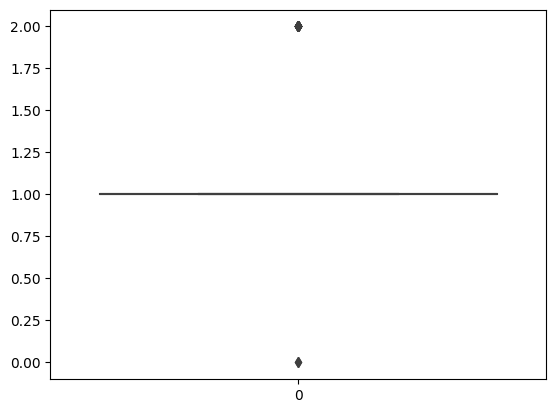

In [163]:
sns.boxplot(df['front_cam_count'])

<Axes: ylabel='count'>

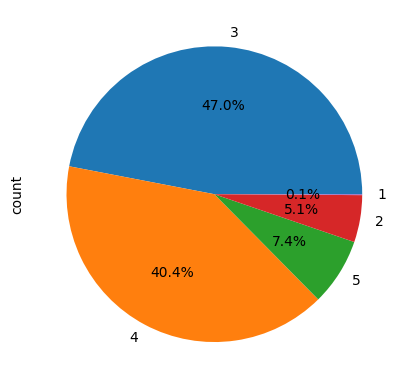

In [164]:
(df['front_cam_count'] + df['rear_cam_count']).value_counts().head().plot(kind='pie',autopct='%0.1f%%')

In [165]:
df['memory_card_supported'].value_counts()

memory_card_supported
0    603
1    389
Name: count, dtype: int64

<Axes: ylabel='count'>

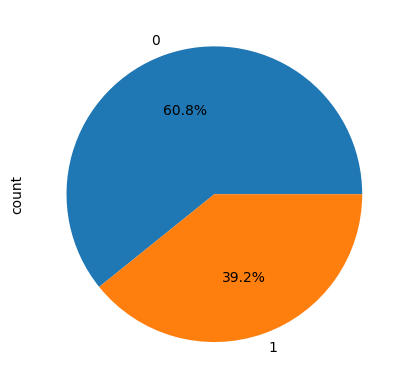

In [166]:
df['memory_card_supported'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')

In [167]:
df['max_external_storage_gb'].value_counts()

max_external_storage_gb
0.0       603
1024.0    280
2048.0     85
1536.0     10
512.0       9
256.0       4
128.0       1
Name: count, dtype: int64

<Axes: ylabel='count'>

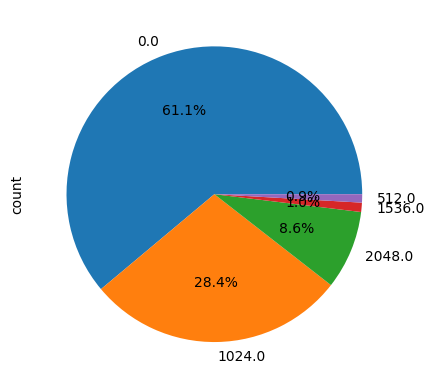

In [168]:
df['max_external_storage_gb'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')

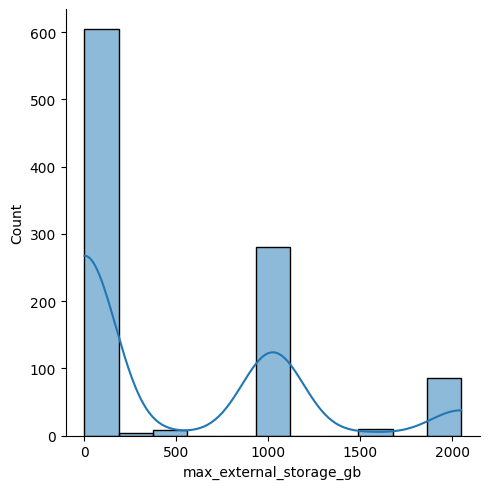

In [169]:
sns.displot(kind='hist',data=df,x='max_external_storage_gb',kde=True)
plt.show()

<Axes: >

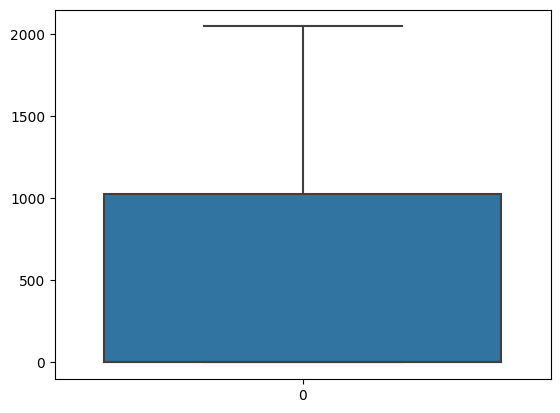

In [170]:
sns.boxplot(df['max_external_storage_gb'])

In [171]:
df['is_hybrid_slot'].value_counts()

is_hybrid_slot
0    749
1    243
Name: count, dtype: int64

<Axes: ylabel='count'>

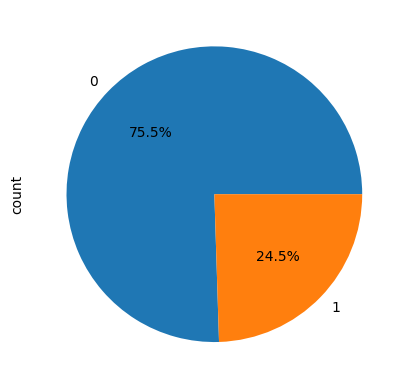

In [172]:
df['is_hybrid_slot'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')

In [173]:
# dominated by android highly skewed
df['os_name'].value_counts()

os_name
Android      950
iOS           35
HarmonyOS      7
Name: count, dtype: int64

<Axes: ylabel='count'>

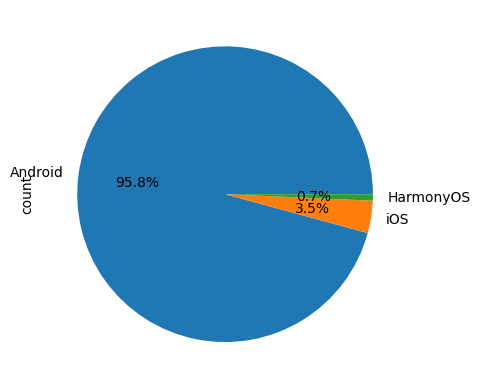

In [174]:
df['os_name'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')

In [175]:
df['os_version'].value_counts()

os_version
15.00    440
14.00    245
16.00    123
13.00     76
12.00     34
11.00     21
18.00     11
26.00     10
17.00      9
10.00      7
6.00       4
9.00       3
19.00      2
5.10       2
4.20       1
5.55       1
20.00      1
27.00      1
5.00       1
Name: count, dtype: int64

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 994
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   brand                    992 non-null    object  
 1   model_name               992 non-null    object  
 2   price                    992 non-null    int64   
 3   rating                   992 non-null    float64 
 4   has_5g                   992 non-null    int64   
 5   has_nfc                  992 non-null    int64   
 6   has_ir_blaster           992 non-null    int64   
 7   has_vo5g                 992 non-null    int64   
 8   chipset_brand            992 non-null    object  
 9   cpu_cores                992 non-null    float64 
 10  max_speed_ghz            992 non-null    float64 
 11  ram_gb                   992 non-null    Int64   
 12  storage_gb               992 non-null    Int64   
 13  battery_mAh              992 non-null    Int64   
 14  fast_charge_w  

In [177]:
df['os_version_clean'] = df['os_version'].astype(float).astype(int)


In [178]:
df.loc[df['os_name']=='Android', 'os_version_clean'] = \
df.loc[df['os_name']=='Android', 'os_version_clean'].clip(4, 15)


In [179]:
df.loc[df['os_name']=='iOS', 'os_version_clean'] = \
df.loc[df['os_name']=='iOS', 'os_version_clean'].clip(15, 18)


In [180]:
df.loc[df['os_name']=='HarmonyOS', 'os_version_clean'] = \
df.loc[df['os_name']=='HarmonyOS', 'os_version_clean'].clip(4, 6)


In [181]:
df['os_version_normalized'] = df.groupby('os_name')['os_version_clean'].transform(
    lambda x: x - x.min() + 1
)


In [182]:
df['os_version_normalized'].value_counts()

os_version_normalized
11    563
10    245
9      75
8      34
4      25
7      21
2       8
3       7
6       7
1       4
5       3
Name: count, dtype: int64

In [183]:
df = df.drop(columns=['os_version'])


<Axes: ylabel='count'>

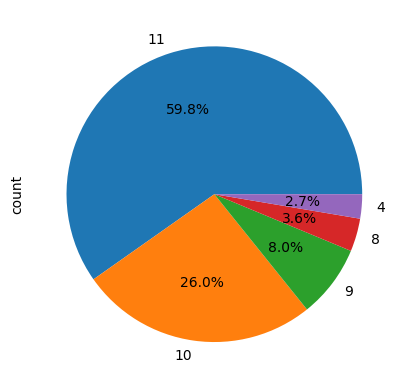

In [184]:
df['os_version_normalized'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')

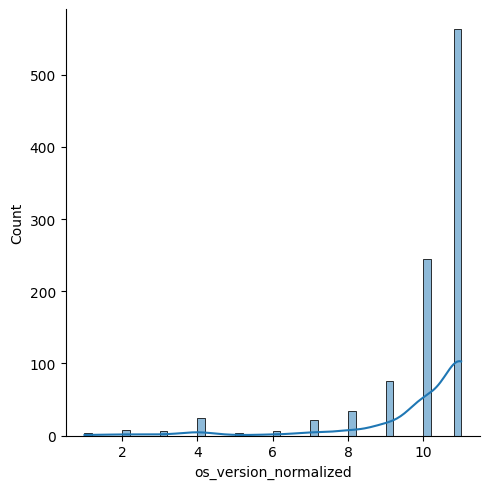

In [185]:
sns.displot(kind='hist',data=df,x='os_version_normalized',kde=True)
plt.show()

<Axes: >

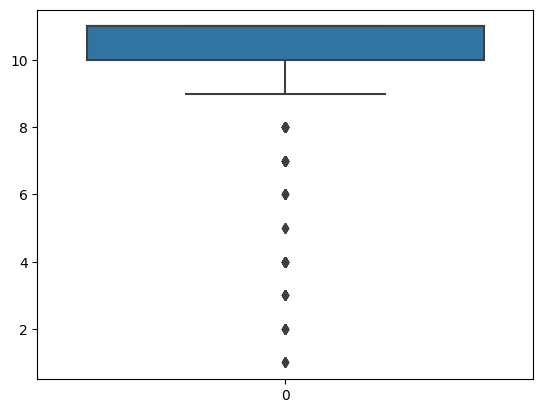

In [186]:
sns.boxplot(df['os_version_normalized'])

In [187]:
# Bivariate analysis -> price column with others

In [188]:
df.groupby('brand').count()['model_name'].sort_values(ascending=False)

brand
Samsung     147
Vivo        140
Realme      123
Oppo         97
Xiaomi       96
Motorola     70
OnePlus      52
Poco         47
Iqoo         44
Infinix      37
Apple        35
Tecno        28
Honor        25
Nothing      21
Google       20
Huawei       10
Name: model_name, dtype: int64

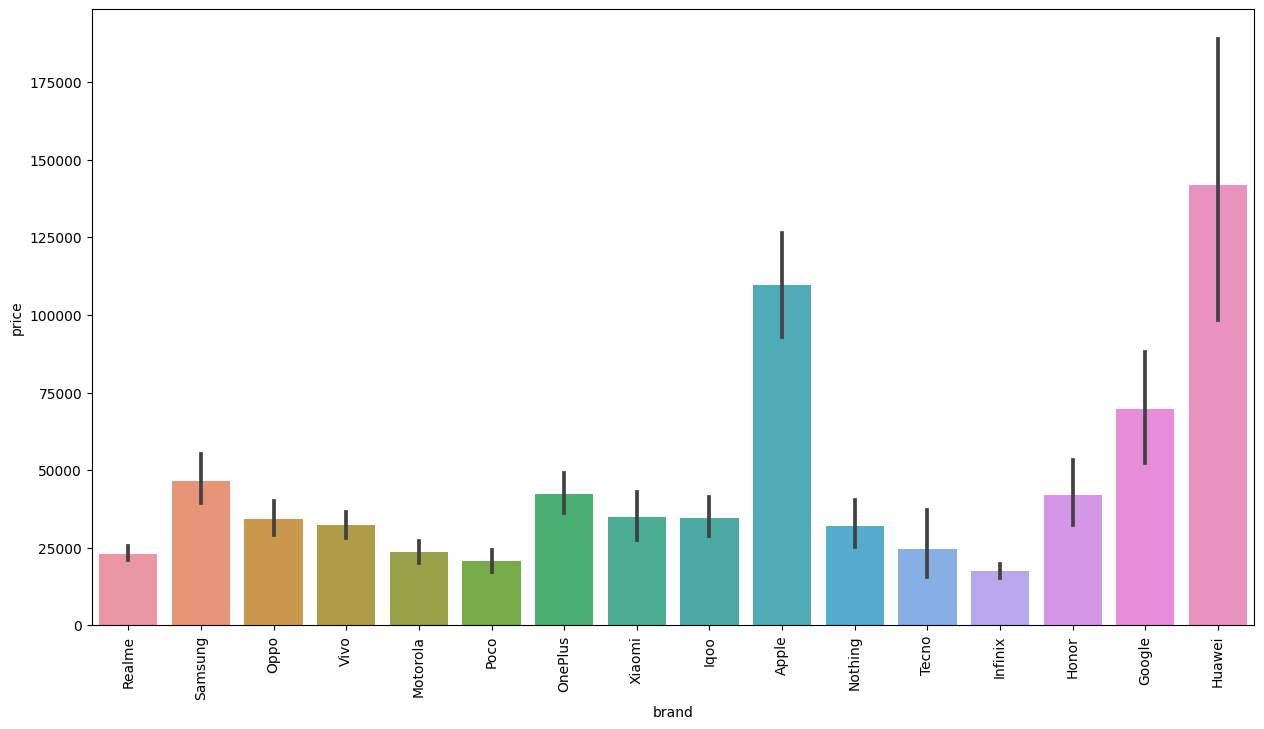

In [189]:
# price vs brand
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='brand', y='price')
plt.xticks(rotation='vertical')
plt.show()

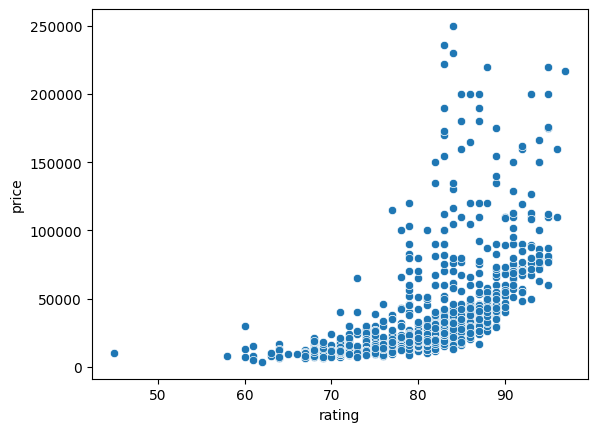

In [190]:
# price vs rating -> there is outlier 
sns.scatterplot(data=df,x='rating',y='price')
plt.show()

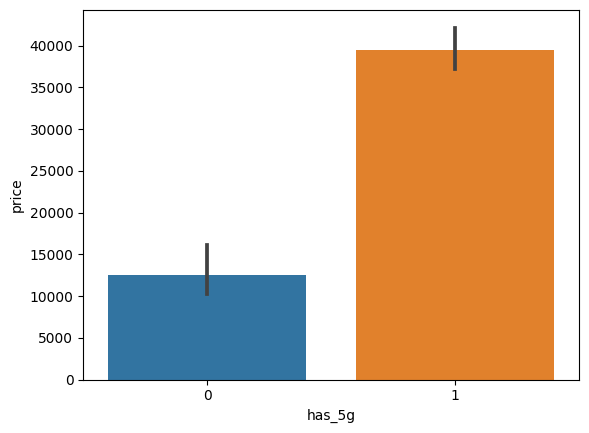

In [191]:
# price vs has_5g
sns.barplot(data=df,x='has_5g',y='price')
plt.show()

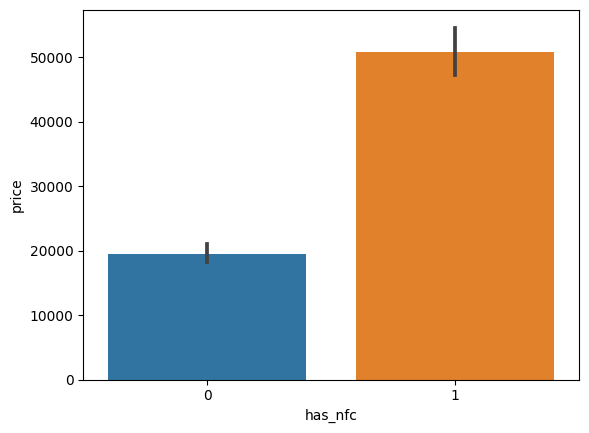

In [192]:
#price vs has_nfc
sns.barplot(data=df,x='has_nfc',y='price')
plt.show()

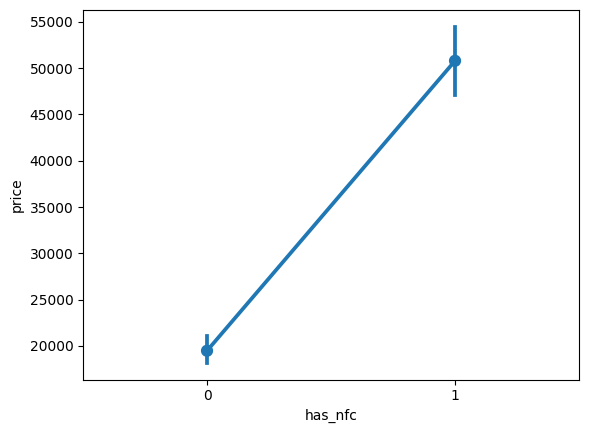

In [193]:
sns.pointplot(data=df,x='has_nfc',y='price')
plt.show()

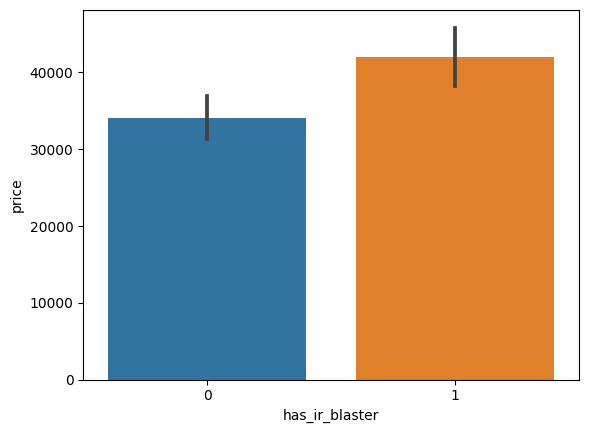

In [194]:
# price vs ir_blaster
sns.barplot(data=df,x='has_ir_blaster',y='price')
plt.show()

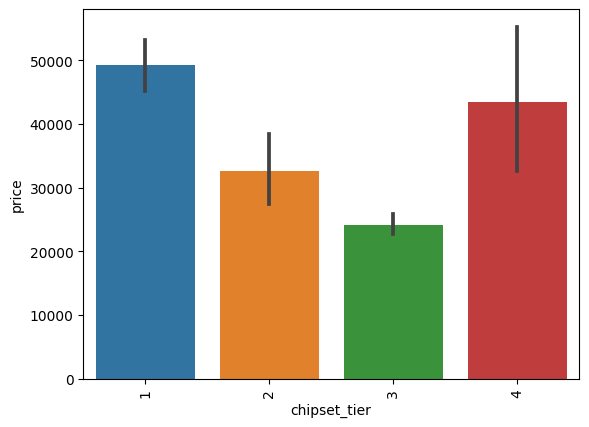

In [195]:
# price vs chipset
sns.barplot(data=df,x='chipset_tier',y='price')
plt.xticks(rotation='vertical')
plt.show()

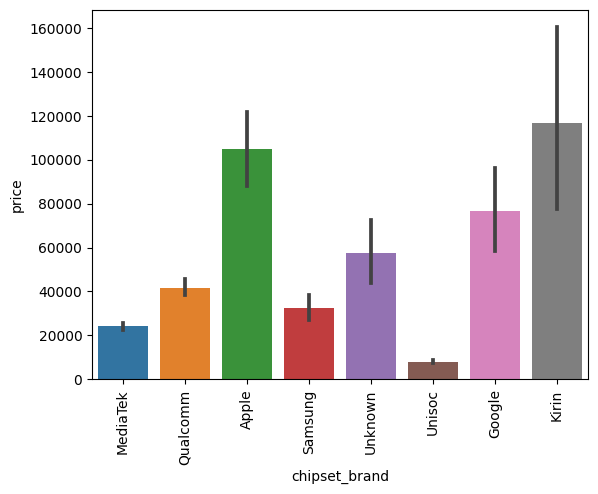

In [196]:
# price vs chipset_brand
sns.barplot(data=df,x='chipset_brand',y='price')
plt.xticks(rotation='vertical')
plt.show()

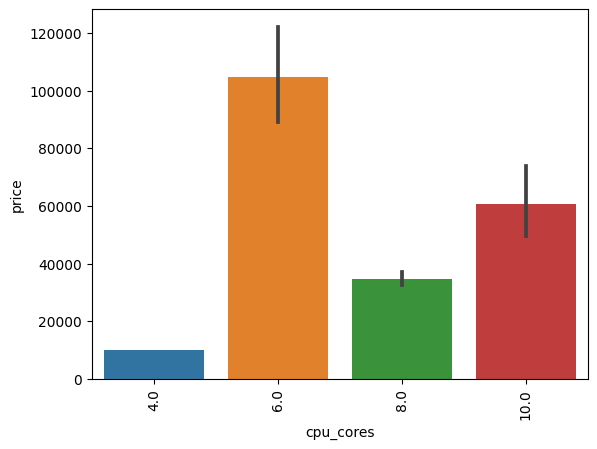

In [197]:
# price vs cpu_cores
sns.barplot(data=df,x='cpu_cores',y='price')
plt.xticks(rotation='vertical')
plt.show()

In [198]:
pd.crosstab(df['cpu_cores'],df['os_name'])

os_name,Android,HarmonyOS,iOS
cpu_cores,,,
4.0,1,0,0
6.0,0,0,33
8.0,938,7,2
10.0,11,0,0


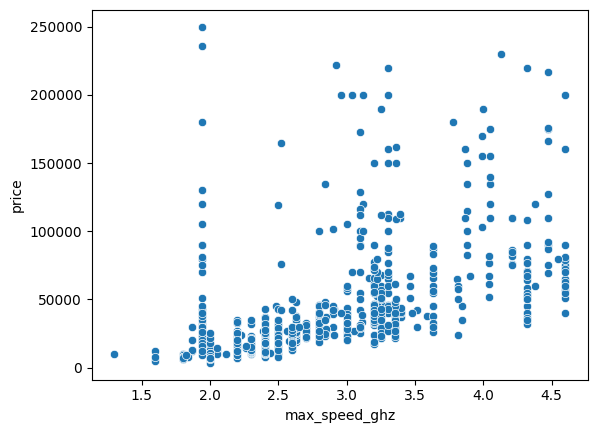

In [199]:
# price vs max_speed_ghz
sns.scatterplot(data=df,x='max_speed_ghz',y='price')
plt.show()

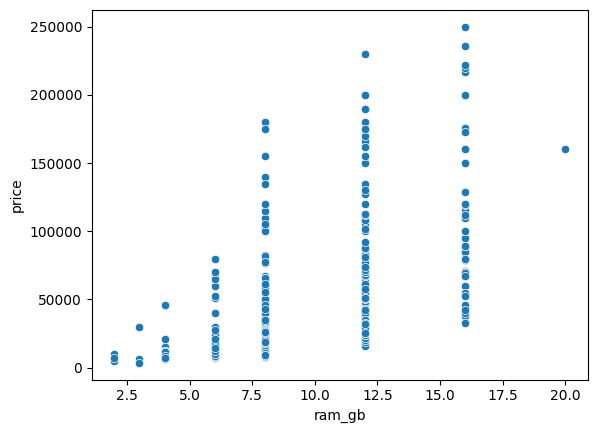

In [200]:
# price vs ram_gb ->  
sns.scatterplot(data=df,x='ram_gb',y='price')
plt.show()

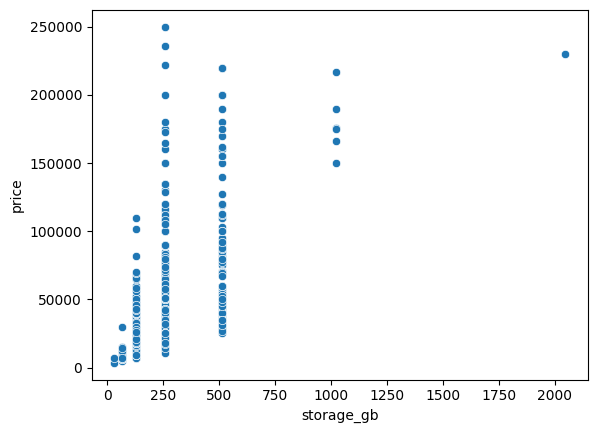

In [201]:
# price vs storage_gb -> outliers present
sns.scatterplot(data=df,x='storage_gb',y='price')
plt.show()

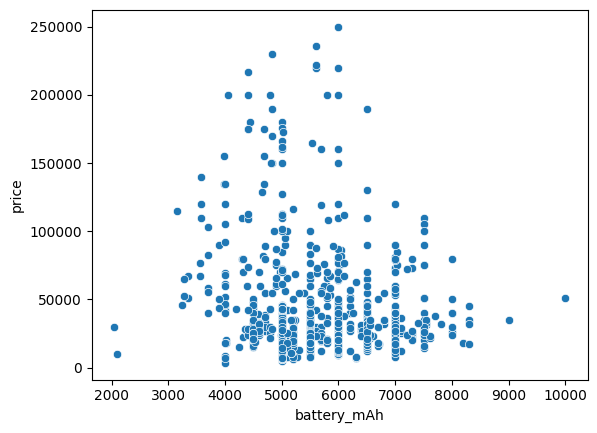

In [202]:
# price vs battery_mAh -> outliers present
sns.scatterplot(data=df,x='battery_mAh',y='price')
plt.show()

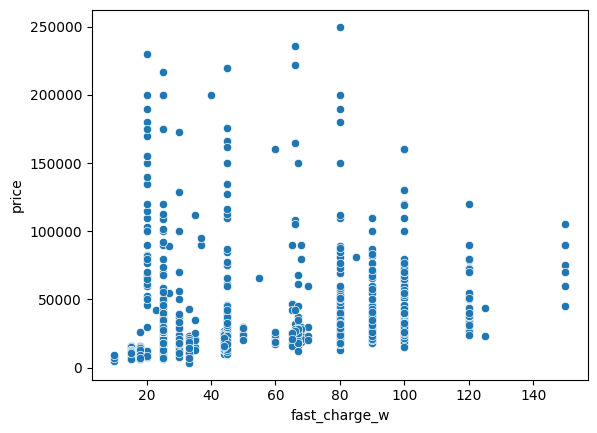

In [203]:
# price vs fast_charge_w -> outliers present
sns.scatterplot(data=df,x='fast_charge_w',y='price')
plt.show()

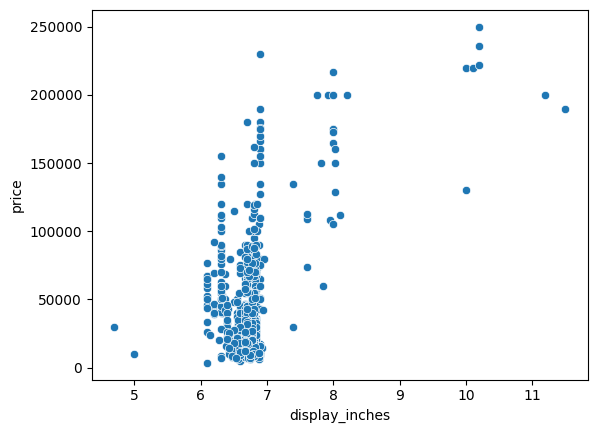

In [204]:
# price vs display_inches -> multiple outliers present
sns.scatterplot(data=df,x='display_inches',y='price')
plt.show()

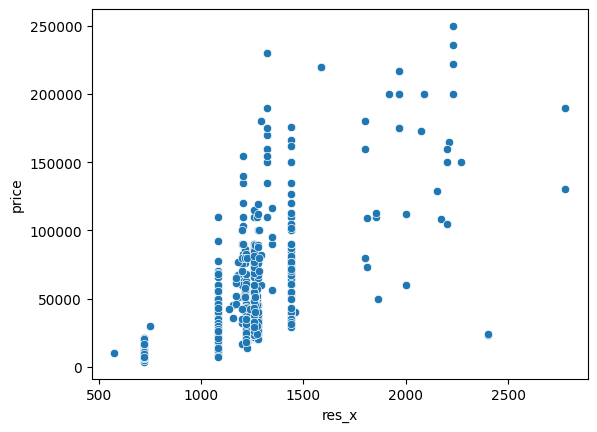

In [205]:
# price vs res_x -> multiple outliers present
sns.scatterplot(data=df,x='res_x',y='price')
plt.show()

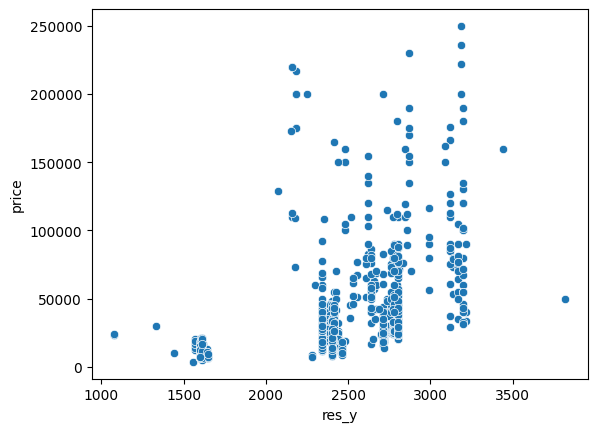

In [206]:
# price vs res_y -> some outliers present
sns.scatterplot(data=df,x='res_y',y='price')
plt.show()

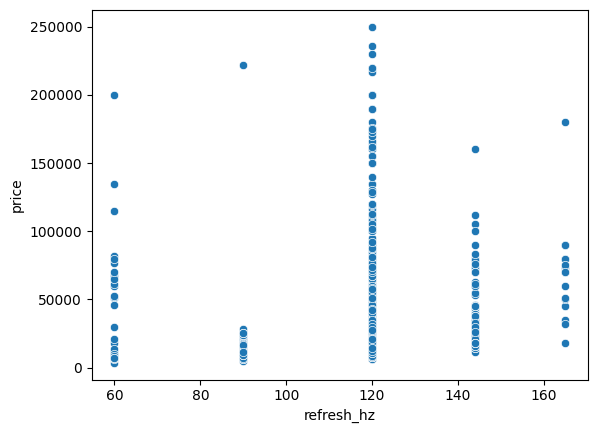

In [207]:
# price vs refresh_hz -> some outliers present
sns.scatterplot(data=df,x='refresh_hz',y='price')
plt.show()

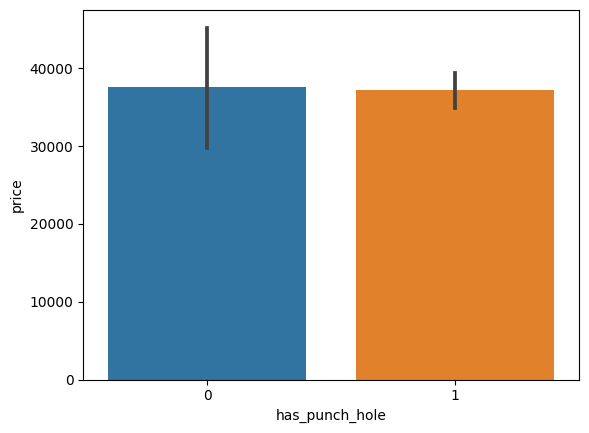

In [208]:
#price vs has_punch_hole
sns.barplot(data=df,x='has_punch_hole',y='price')
plt.show()

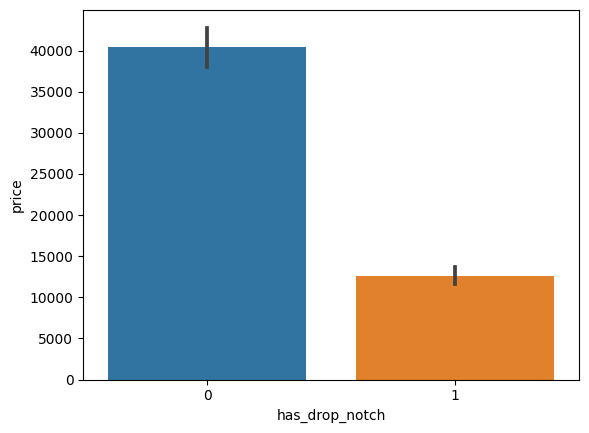

In [209]:
#price vs has_drop_notch
sns.barplot(data=df,x='has_drop_notch',y='price')
plt.show()

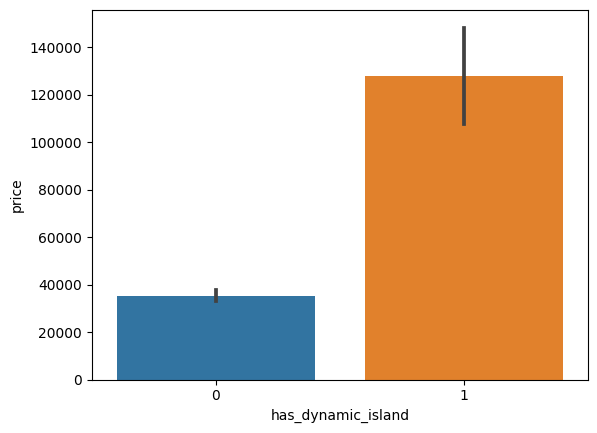

In [210]:
#price vs has_dynamic_island
sns.barplot(data=df,x='has_dynamic_island',y='price')
plt.show()

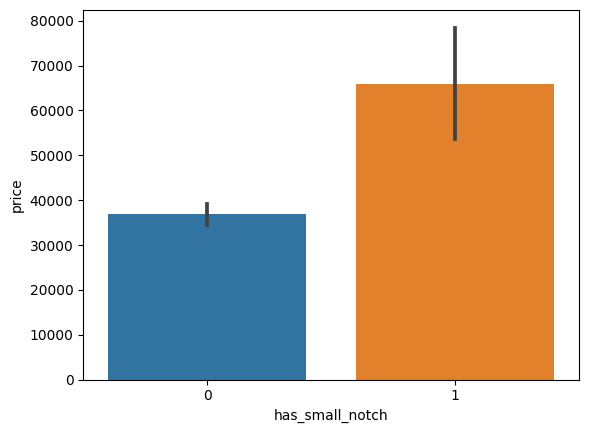

In [211]:
#price vs has_small_notch
sns.barplot(data=df,x='has_small_notch',y='price')
plt.show()

In [212]:
df.drop(columns=['has_large_notch'],inplace=True)

In [213]:
df.head()

,brand,model_name,price,rating,has_5g,has_nfc,has_ir_blaster,has_vo5g,chipset_brand,cpu_cores,max_speed_ghz,ram_gb,storage_gb,battery_mAh,fast_charge_w,display_inches,res_x,res_y,refresh_hz,has_punch_hole,has_drop_notch,has_dynamic_island,has_small_notch,display_type,primary_real_cam_mp,primary_front_cam_mp,rear_cam_count,front_cam_count,memory_card_supported,max_external_storage_gb,is_hybrid_slot,os_name,price_log,chipset_tier,os_version_clean,os_version_normalized
0,Realme,P4x 5G,15999,68.0,1,0,0,0,MediaTek,8.0,2.50,6,128,7000,45,6.72,1080,2400,144,1,0,0,0,Punch Hole,50.0,8.0,2,1,1,1024.0,1,Android,9.680344,3,15,11
1,Samsung,Galaxy Z Tri Fold,219990,95.0,1,1,1,1,Qualcomm,8.0,4.32,16,512,5600,45,10.00,1584,2160,120,1,0,0,0,Punch Hole,200.0,10.0,3,2,0,0.0,0,Android,12.301342,1,15,11
2,Samsung,Galaxy S24 Ultra,84999,92.0,1,1,0,1,Qualcomm,8.0,3.30,12,256,5000,45,6.80,1440,3120,120,1,0,0,0,Punch Hole,200.0,12.0,4,1,0,0.0,0,Android,11.350407,1,14,10
3,Oppo,Reno 15 5G,39990,90.0,1,1,1,0,MediaTek,8.0,3.25,12,256,6200,80,6.32,1216,2640,120,1,0,0,0,Punch Hole,200.0,50.0,3,1,0,0.0,0,Android,10.596410,3,15,11
4,Vivo,X300 Pro 5G,109999,96.0,1,1,1,0,MediaTek,8.0,4.21,16,512,6510,90,6.78,1260,2800,120,1,0,0,0,Punch Hole,200.0,50.0,3,1,0,0.0,0,Android,11.608236,3,15,11


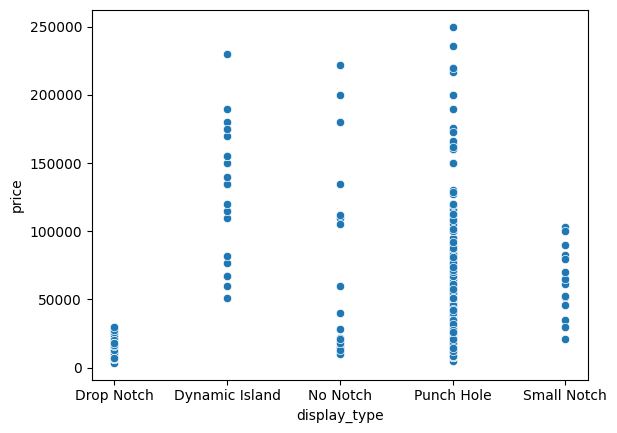

In [214]:
# price vs display_type -> one outliers present
sns.scatterplot(data=df,x='display_type',y='price')
plt.show()

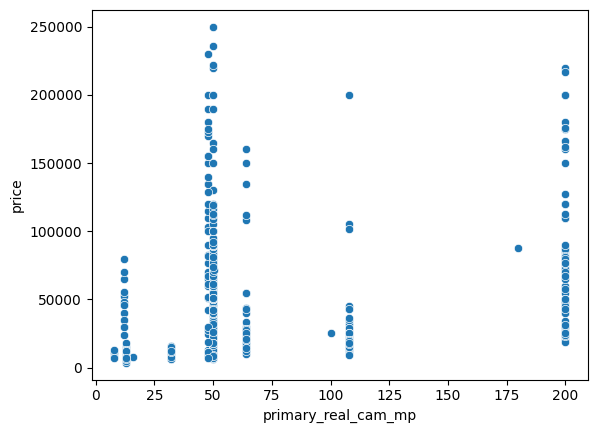

In [215]:
# price vs primary_real_cam_mp -> some outliers present
sns.scatterplot(data=df,x='primary_real_cam_mp',y='price')
plt.show()

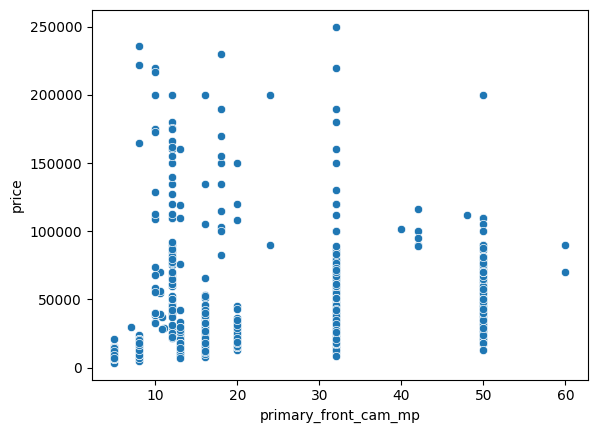

In [216]:
# price vs primary_front_cam_mp -> some outliers present
sns.scatterplot(data=df,x='primary_front_cam_mp',y='price')
plt.show()

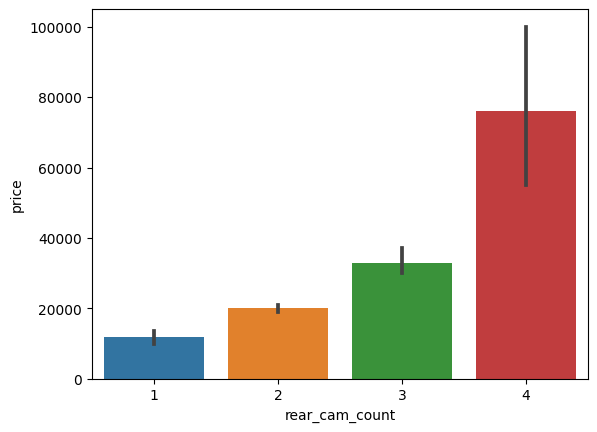

In [217]:
#price vs rear_cam_count
sns.barplot(data=df,x='rear_cam_count',y='price',estimator=np.median)
plt.show()

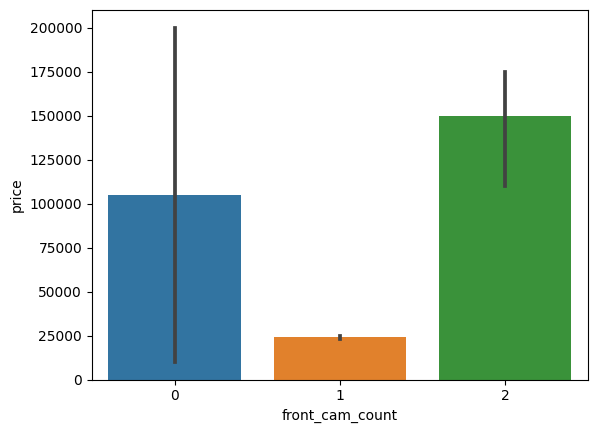

In [218]:
#price vs front_cam_count
sns.barplot(data=df,x='front_cam_count',y='price',estimator=np.median)
plt.show()

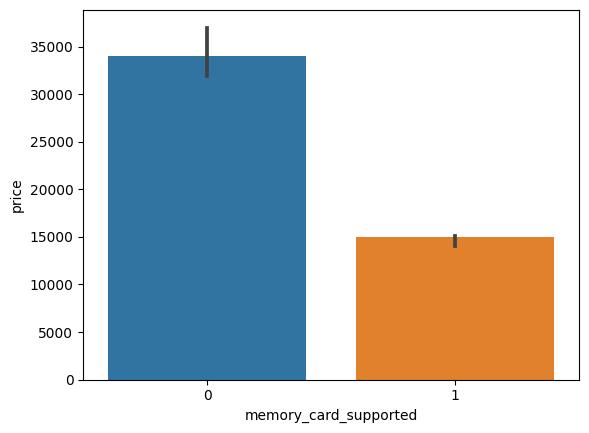

In [219]:
#price vs memory_card_supported
sns.barplot(data=df,x='memory_card_supported',y='price',estimator=np.median)
plt.show()

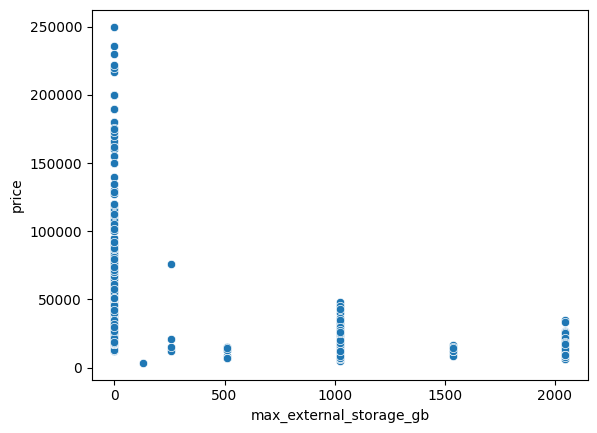

In [220]:
# price vs max_external_storage_gb -> some outliers present
sns.scatterplot(data=df,x='max_external_storage_gb',y='price')
plt.show()

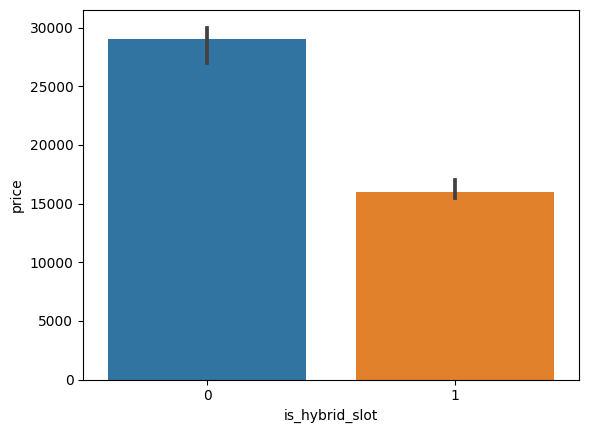

In [221]:
#price vs is_hybrid_slot
sns.barplot(data=df,x='is_hybrid_slot',y='price',estimator=np.median)
plt.show()

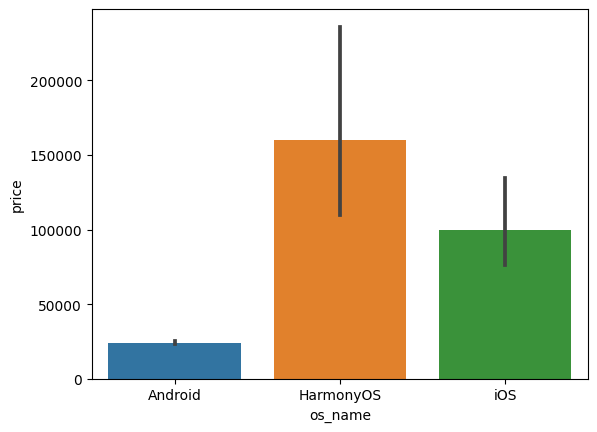

In [222]:
#price vs os_name
sns.barplot(data=df,x='os_name',y='price',estimator=np.median)
plt.show()

In [223]:
df.drop(columns=['os_version_clean'],inplace=True)

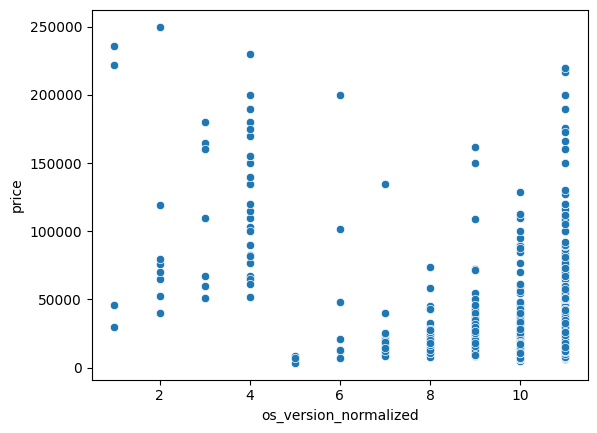

In [224]:
# price vs os_version_normalized -> some outliers present
sns.scatterplot(data=df,x='os_version_normalized',y='price')
plt.show()

In [225]:
df.head()

,brand,model_name,price,rating,has_5g,has_nfc,has_ir_blaster,has_vo5g,chipset_brand,cpu_cores,max_speed_ghz,ram_gb,storage_gb,battery_mAh,fast_charge_w,display_inches,res_x,res_y,refresh_hz,has_punch_hole,has_drop_notch,has_dynamic_island,has_small_notch,display_type,primary_real_cam_mp,primary_front_cam_mp,rear_cam_count,front_cam_count,memory_card_supported,max_external_storage_gb,is_hybrid_slot,os_name,price_log,chipset_tier,os_version_normalized
0,Realme,P4x 5G,15999,68.0,1,0,0,0,MediaTek,8.0,2.50,6,128,7000,45,6.72,1080,2400,144,1,0,0,0,Punch Hole,50.0,8.0,2,1,1,1024.0,1,Android,9.680344,3,11
1,Samsung,Galaxy Z Tri Fold,219990,95.0,1,1,1,1,Qualcomm,8.0,4.32,16,512,5600,45,10.00,1584,2160,120,1,0,0,0,Punch Hole,200.0,10.0,3,2,0,0.0,0,Android,12.301342,1,11
2,Samsung,Galaxy S24 Ultra,84999,92.0,1,1,0,1,Qualcomm,8.0,3.30,12,256,5000,45,6.80,1440,3120,120,1,0,0,0,Punch Hole,200.0,12.0,4,1,0,0.0,0,Android,11.350407,1,10
3,Oppo,Reno 15 5G,39990,90.0,1,1,1,0,MediaTek,8.0,3.25,12,256,6200,80,6.32,1216,2640,120,1,0,0,0,Punch Hole,200.0,50.0,3,1,0,0.0,0,Android,10.596410,3,11
4,Vivo,X300 Pro 5G,109999,96.0,1,1,1,0,MediaTek,8.0,4.21,16,512,6510,90,6.78,1260,2800,120,1,0,0,0,Punch Hole,200.0,50.0,3,1,0,0.0,0,Android,11.608236,3,11


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 994
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   brand                    992 non-null    object  
 1   model_name               992 non-null    object  
 2   price                    992 non-null    int64   
 3   rating                   992 non-null    float64 
 4   has_5g                   992 non-null    int64   
 5   has_nfc                  992 non-null    int64   
 6   has_ir_blaster           992 non-null    int64   
 7   has_vo5g                 992 non-null    int64   
 8   chipset_brand            992 non-null    object  
 9   cpu_cores                992 non-null    float64 
 10  max_speed_ghz            992 non-null    float64 
 11  ram_gb                   992 non-null    Int64   
 12  storage_gb               992 non-null    Int64   
 13  battery_mAh              992 non-null    Int64   
 14  fast_charge_w  

In [227]:
df_corr = df.select_dtypes(include=['int64', 'float64'])
df_corr.corr()


,price,rating,has_5g,has_nfc,has_ir_blaster,has_vo5g,cpu_cores,max_speed_ghz,ram_gb,storage_gb,battery_mAh,fast_charge_w,display_inches,res_x,res_y,refresh_hz,has_punch_hole,has_drop_notch,has_dynamic_island,has_small_notch,primary_real_cam_mp,primary_front_cam_mp,rear_cam_count,front_cam_count,memory_card_supported,max_external_storage_gb,is_hybrid_slot,price_log,chipset_tier,os_version_normalized
price,1.000000,0.551073,0.197739,0.416241,0.103884,0.351438,-0.237402,0.579176,0.618320,0.624553,-0.082709,0.157808,0.513043,0.697133,0.454584,0.101168,-0.003501,-0.235782,0.349768,0.091911,0.319287,0.168410,0.420143,0.408998,-0.452438,-0.410418,-0.291319,0.893118,-0.242427,-0.317526
rating,0.551073,1.000000,0.410191,0.552210,0.268670,0.313874,0.068799,0.672935,0.747189,0.567873,0.008554,0.444463,0.177832,0.644164,0.681680,0.322645,0.371531,-0.444039,0.074104,-0.024804,0.413101,0.508318,0.554874,0.250783,-0.509904,-0.441808,-0.201009,0.743491,-0.372136,-0.009581
has_5g,0.197739,0.410191,1.000000,0.148396,0.082312,0.127335,0.017516,0.324720,0.327064,0.230688,0.150056,0.274417,0.070668,0.274421,0.316173,0.281642,0.248146,-0.289115,0.042773,0.035676,0.108499,0.215772,0.183361,0.066205,-0.326010,-0.219889,0.084244,0.375922,-0.226442,0.082078
has_nfc,0.416241,0.552210,0.148396,1.000000,0.204414,0.237557,-0.077981,0.461049,0.449391,0.346798,-0.079664,0.188913,0.060472,0.393607,0.432666,0.156666,0.099534,-0.222233,0.125215,0.087190,0.194468,0.231056,0.370828,0.154150,-0.344973,-0.297553,-0.236152,0.540436,-0.192060,-0.111109
has_ir_blaster,0.103884,0.268670,0.082312,0.204414,1.000000,0.043948,0.098689,0.284839,0.342946,0.205157,0.438576,0.540125,0.131443,0.285180,0.382193,0.305870,0.320201,-0.268197,-0.115700,-0.096504,0.196550,0.226492,0.099191,0.050576,-0.276017,-0.283945,-0.176419,0.193295,-0.031635,0.136169
has_vo5g,0.351438,0.313874,0.127335,0.237557,0.043948,1.000000,0.174913,0.323519,0.339790,0.252108,-0.020046,0.130074,0.152066,0.291096,0.257301,0.152155,0.185380,-0.152346,-0.061256,-0.051093,0.108369,0.109506,0.224070,0.183928,-0.234371,-0.232593,-0.139396,0.370870,-0.118129,0.096980
cpu_cores,-0.237402,0.068799,0.017516,-0.077981,0.098689,0.174913,1.000000,-0.172596,0.063936,-0.118718,0.233348,0.161306,0.148227,-0.031702,-0.051424,0.267914,0.380292,0.039477,-0.640212,-0.455818,0.072218,0.065508,0.105854,0.071019,0.069990,0.066372,0.063029,-0.189039,0.133990,0.563173
max_speed_ghz,0.579176,0.672935,0.324720,0.461049,0.284839,0.323519,-0.172596,1.000000,0.593174,0.528970,0.077725,0.376241,0.041109,0.468148,0.521766,0.180498,0.139293,-0.308546,0.246702,0.125410,0.283768,0.257945,0.325649,0.167484,-0.542522,-0.478367,-0.314609,0.712849,-0.371485,-0.073208
ram_gb,0.618320,0.747189,0.327064,0.449391,0.342946,0.339790,0.063936,0.593174,1.000000,0.648786,0.191990,0.546214,0.257096,0.641533,0.647364,0.369054,0.363958,-0.407639,0.003750,-0.054085,0.311659,0.456160,0.428154,0.243141,-0.574924,-0.517424,-0.305581,0.758684,-0.245671,0.045162
storage_gb,0.624553,0.567873,0.230688,0.346798,0.205157,0.252108,-0.118718,0.528970,0.648786,1.000000,0.060139,0.330115,0.221733,0.468618,0.448951,0.224460,0.126323,-0.262994,0.226013,0.002595,0.241910,0.295283,0.331792,0.228242,-0.435662,-0.386767,-0.272402,0.643204,-0.205616,-0.045605


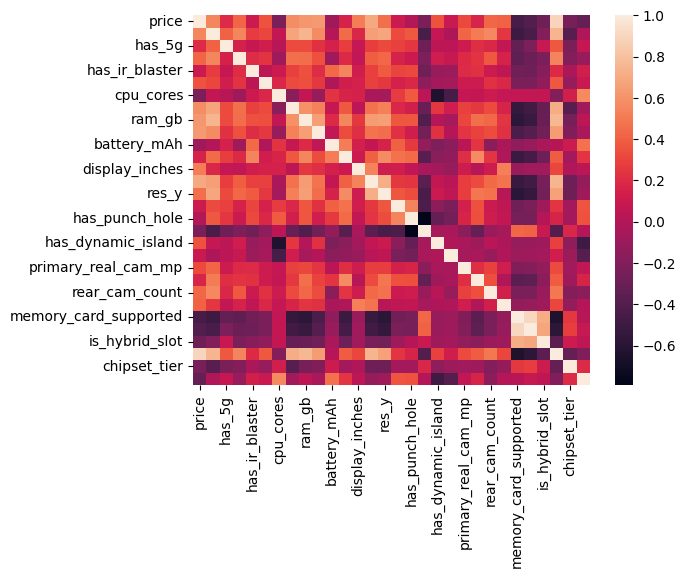

In [228]:
sns.heatmap(df_corr.corr())
plt.show()

In [229]:
df_corr.corr()['price']

price                      1.000000
rating                     0.551073
has_5g                     0.197739
has_nfc                    0.416241
has_ir_blaster             0.103884
has_vo5g                   0.351438
cpu_cores                 -0.237402
max_speed_ghz              0.579176
ram_gb                     0.618320
storage_gb                 0.624553
battery_mAh               -0.082709
fast_charge_w              0.157808
display_inches             0.513043
res_x                      0.697133
res_y                      0.454584
refresh_hz                 0.101168
has_punch_hole            -0.003501
has_drop_notch            -0.235782
has_dynamic_island         0.349768
has_small_notch            0.091911
primary_real_cam_mp        0.319287
primary_front_cam_mp       0.168410
rear_cam_count             0.420143
front_cam_count            0.408998
memory_card_supported     -0.452438
max_external_storage_gb   -0.410418
is_hybrid_slot            -0.291319
price_log                  0

In [230]:
df.isnull().sum()

brand                      0
model_name                 0
price                      0
rating                     0
has_5g                     0
has_nfc                    0
has_ir_blaster             0
has_vo5g                   0
chipset_brand              0
cpu_cores                  0
max_speed_ghz              0
ram_gb                     0
storage_gb                 0
battery_mAh                0
fast_charge_w              0
display_inches             0
res_x                      0
res_y                      0
refresh_hz                 0
has_punch_hole             0
has_drop_notch             0
has_dynamic_island         0
has_small_notch            0
display_type               0
primary_real_cam_mp        0
primary_front_cam_mp       0
rear_cam_count             0
front_cam_count            0
memory_card_supported      0
max_external_storage_gb    0
is_hybrid_slot             0
os_name                    0
price_log                  0
chipset_tier               0
os_version_nor

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 994
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   brand                    992 non-null    object  
 1   model_name               992 non-null    object  
 2   price                    992 non-null    int64   
 3   rating                   992 non-null    float64 
 4   has_5g                   992 non-null    int64   
 5   has_nfc                  992 non-null    int64   
 6   has_ir_blaster           992 non-null    int64   
 7   has_vo5g                 992 non-null    int64   
 8   chipset_brand            992 non-null    object  
 9   cpu_cores                992 non-null    float64 
 10  max_speed_ghz            992 non-null    float64 
 11  ram_gb                   992 non-null    Int64   
 12  storage_gb               992 non-null    Int64   
 13  battery_mAh              992 non-null    Int64   
 14  fast_charge_w  

In [232]:
# OneHotEncoder used for categorical columns
#pd.get_dummies(df,columns=['model_name','chipset_brand','os'],drop_first=True)

In [233]:
df_ml = df.drop(columns=['model_name', 'chipset_brand'])

categorical_cols = ['brand', 'display_type', 'os_name']

df_ml = pd.get_dummies(df_ml, columns=categorical_cols, drop_first=True)


In [234]:
df_ml.head()

,price,rating,has_5g,has_nfc,has_ir_blaster,has_vo5g,cpu_cores,max_speed_ghz,ram_gb,storage_gb,battery_mAh,fast_charge_w,display_inches,res_x,res_y,refresh_hz,has_punch_hole,has_drop_notch,has_dynamic_island,has_small_notch,primary_real_cam_mp,primary_front_cam_mp,rear_cam_count,front_cam_count,memory_card_supported,max_external_storage_gb,is_hybrid_slot,price_log,chipset_tier,os_version_normalized,brand_Google,brand_Honor,brand_Huawei,brand_Infinix,brand_Iqoo,brand_Motorola,brand_Nothing,brand_OnePlus,brand_Oppo,brand_Poco,brand_Realme,brand_Samsung,brand_Tecno,brand_Vivo,brand_Xiaomi,display_type_Dynamic Island,display_type_No Notch,display_type_Punch Hole,display_type_Small Notch,os_name_HarmonyOS,os_name_iOS
0,15999,68.0,1,0,0,0,8.0,2.50,6,128,7000,45,6.72,1080,2400,144,1,0,0,0,50.0,8.0,2,1,1,1024.0,1,9.680344,3,11,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1,219990,95.0,1,1,1,1,8.0,4.32,16,512,5600,45,10.00,1584,2160,120,1,0,0,0,200.0,10.0,3,2,0,0.0,0,12.301342,1,11,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,84999,92.0,1,1,0,1,8.0,3.30,12,256,5000,45,6.80,1440,3120,120,1,0,0,0,200.0,12.0,4,1,0,0.0,0,11.350407,1,10,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
3,39990,90.0,1,1,1,0,8.0,3.25,12,256,6200,80,6.32,1216,2640,120,1,0,0,0,200.0,50.0,3,1,0,0.0,0,10.596410,3,11,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4,109999,96.0,1,1,1,0,8.0,4.21,16,512,6510,90,6.78,1260,2800,120,1,0,0,0,200.0,50.0,3,1,0,0.0,0,11.608236,3,11,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False


In [235]:
df_ml.to_parquet('ml_ready_smartphones.parquet',index=False)
df_ml.to_csv('ml_ready_smartphones.csv',index=False)